In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
excel_file = 'Harvested Area_Yield of China.xlsx'

In [6]:
rainfed_harvested_data = pd.read_excel(excel_file, sheet_name='Rainfed_Harvested')
rainfed_yield_data = pd.read_excel(excel_file, sheet_name='Rainfed_Yield')

In [7]:
irrigated_harvested_data = pd.read_excel(excel_file, sheet_name='Irrigation_Harvested')
irrigated_yield_data = pd.read_excel(excel_file, sheet_name='Irrigation_Yield')


In [8]:
rainfed_harvested_data.describe()

,pointid,Wheat,Rice,Maize,Soybean,Rapeseed,Groundnut,Cotton,SugBeet,SugCane
count,72439.000000,72439.000000,72439.000000,72439.000000,72439.000000,72439.000000,72439.000000,72439.000000,72439.000000,72439.000000
mean,36220.000000,127.498374,4.242836,257.748790,99.213222,82.773115,41.040119,13.316287,2.443384,18.888989
std,20911.482412,407.671891,43.170766,602.334668,313.411867,277.323123,180.822248,146.002997,59.522545,144.593050
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18110.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36220.000000,0.000000,0.000000,14.200000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54329.500000,31.000000,0.000000,252.199997,54.000000,23.400000,2.600000,0.000000,0.000000,0.100000
max,72439.000000,6285.899902,3960.000000,8866.400391,5546.500000,7380.299805,4924.500000,4942.100098,4512.500000,7650.799805


------------------------------------------------------------------------------------------
原始grid数据缺乏经纬度数据，无法将72000个grid中的种植面积和产量对应至论文中提及的7个区域。因此在优化部分的模拟采用的数据来自原论文整理好的部分(Table S9-S12)，在EDA中，我们发现长江平原的作物产量最高，但农药用量，温室气体排放等可持续指标也相应较高，因此在本次模拟中，我们重点关注该区域的作物转换

------------------------------------------------------------------------------------------

首先读取TableS9包含灌养和雨养的所有数据：

In [9]:
file_path = './data.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
sheet_names

['Contents',
 'Table S9',
 'Table S10',
 'Table S11',
 'Table S12',
 'Table S13',
 'Table S14',
 'Table S15',
 'Table S16']

In [10]:
df_s9 = pd.read_excel(file_path, sheet_name='Table S9')
df_s10 = pd.read_excel(file_path, sheet_name='Table S10')
df_s11 = pd.read_excel(file_path, sheet_name='Table S11')

In [11]:
df_s9.columns = df_s9.iloc[1]
df_s10.columns = df_s10.iloc[1]
df_s11.columns = df_s11.iloc[1]

In [12]:
df_s9.columns = df_s9.columns.str.replace('\n', ' ')
df_s10.columns = df_s10.columns.str.replace('\n', ' ')
df_s11.columns = df_s11.columns.str.replace('\n', ' ')

In [13]:
df_s9 = df_s9.drop([0, 1]).reset_index(drop=True)
df_s10 = df_s10.drop([0, 1]).reset_index(drop=True) 
df_s11 = df_s11.drop([0, 1]).reset_index(drop=True)  

In [14]:
df_s9 

1,Regions,Crop,Yield (kg/ha),Blue Water (m3/ha),Green Water (m3/ha),GHGs (kg eq CO2/ha),Nitrogen (kg N/ha),Phosphorus (kg P2O5/ha),Potash (kg K2O/ha),Pesticides (kg/ha),Net Profit (US$/ha),Harvested Area (ha)
0,Northeast,Wheat,4008.862726,450.58814,1970.056752,3.15098,159.144914,100.732956,9.658233,4.042886,90.098207,344757.8
1,Northeast,Rice,6971.224029,2708.891439,3880.23585,5.04133,165.864822,78.96508,71.092529,18.424733,970.737479,3319167
2,Northeast,Maize,6467.48858,241.087475,3136.319869,1.179913,175.230883,93.540597,60.74403,8.245211,416.511346,9483499.2
3,Northeast,soybean,1707.137789,28.426541,3016.964595,1.840261,60.592214,62.622626,31.378579,8.491156,224.481575,4575899.3
4,Northeast,rapeseed,1786.043985,2.224894,465.355569,1.639008,190.629915,39.004368,0.918085,0.215088,-1092.575121,84248.5
...,...,...,...,...,...,...,...,...,...,...,...,...
58,Tibet,rapeseed,1336.139537,785.515468,1200.842885,1.418893,122.992218,74.464338,11.469179,7.033597,83.456022,123983.7
59,Tibet,groundnut,1769.154475,0,2665.666985,0.020446,118.389448,90.446823,68.897315,15.850759,604.975823,23221.3
60,Tibet,cotton,2570.887988,5332.965775,1970.20869,1.047532,370.679133,210.279874,20.059414,14.959107,1754.111241,404.7
61,Tibet,sugbeet,50595.117093,249.656862,3517.390819,0.185346,235.65,151.35,22.05,7.000608,822.028666,188


In [15]:
# 分别提取七个地区的数据
regions = ['Northeast', 'North China', 'Yangtze', 'Southern China', 'Northwest', ' Southwest', 'Tibet']

# 创建每个地区的单独数据框
df9 = {region: df_s9[df_s9['Regions'] == region][df_s9.columns].reset_index(drop=True) for region in regions}

In [16]:
harvest_area_by_region = {region: region_df.groupby("Crop")["Harvested Area (ha)"].sum() for region, region_df in df9.items()}

In [17]:
#当前情况下不同grid内作物的种植比例
proportion_by_region = {region: region_df / region_df.sum() for region, region_df in harvest_area_by_region.items()}

In [18]:
proportion_by_region

{'Northeast': Crop
 Maize        0.515785
 Rice         0.180522
 Wheat        0.018751
 cotton       0.000327
 groundnut     0.02916
 rapeseed     0.004582
 soybean      0.248872
 sugbeet      0.002001
 sugcane           0.0
 Name: Harvested Area (ha), dtype: object,
 'North China': Crop
 Maize        0.323136
 Rice         0.050588
 Wheat        0.435823
 cotton       0.074773
 groundnut    0.064226
 rapeseed      0.00755
 soybean      0.041525
 sugbeet      0.002114
 sugcane      0.000266
 Name: Harvested Area (ha), dtype: object,
 'Yangtze': Crop
 Maize        0.055361
 Rice         0.545562
 Wheat        0.131434
 cotton        0.04888
 groundnut    0.032879
 rapeseed     0.149167
 soybean      0.034322
 sugbeet      0.000014
 sugcane       0.00238
 Name: Harvested Area (ha), dtype: object,
 'Southern China': Crop
 Maize        0.040975
 Rice         0.766936
 Wheat        0.001138
 cotton       0.000075
 groundnut    0.094286
 rapeseed     0.004923
 soybean      0.026478
 sugbeet

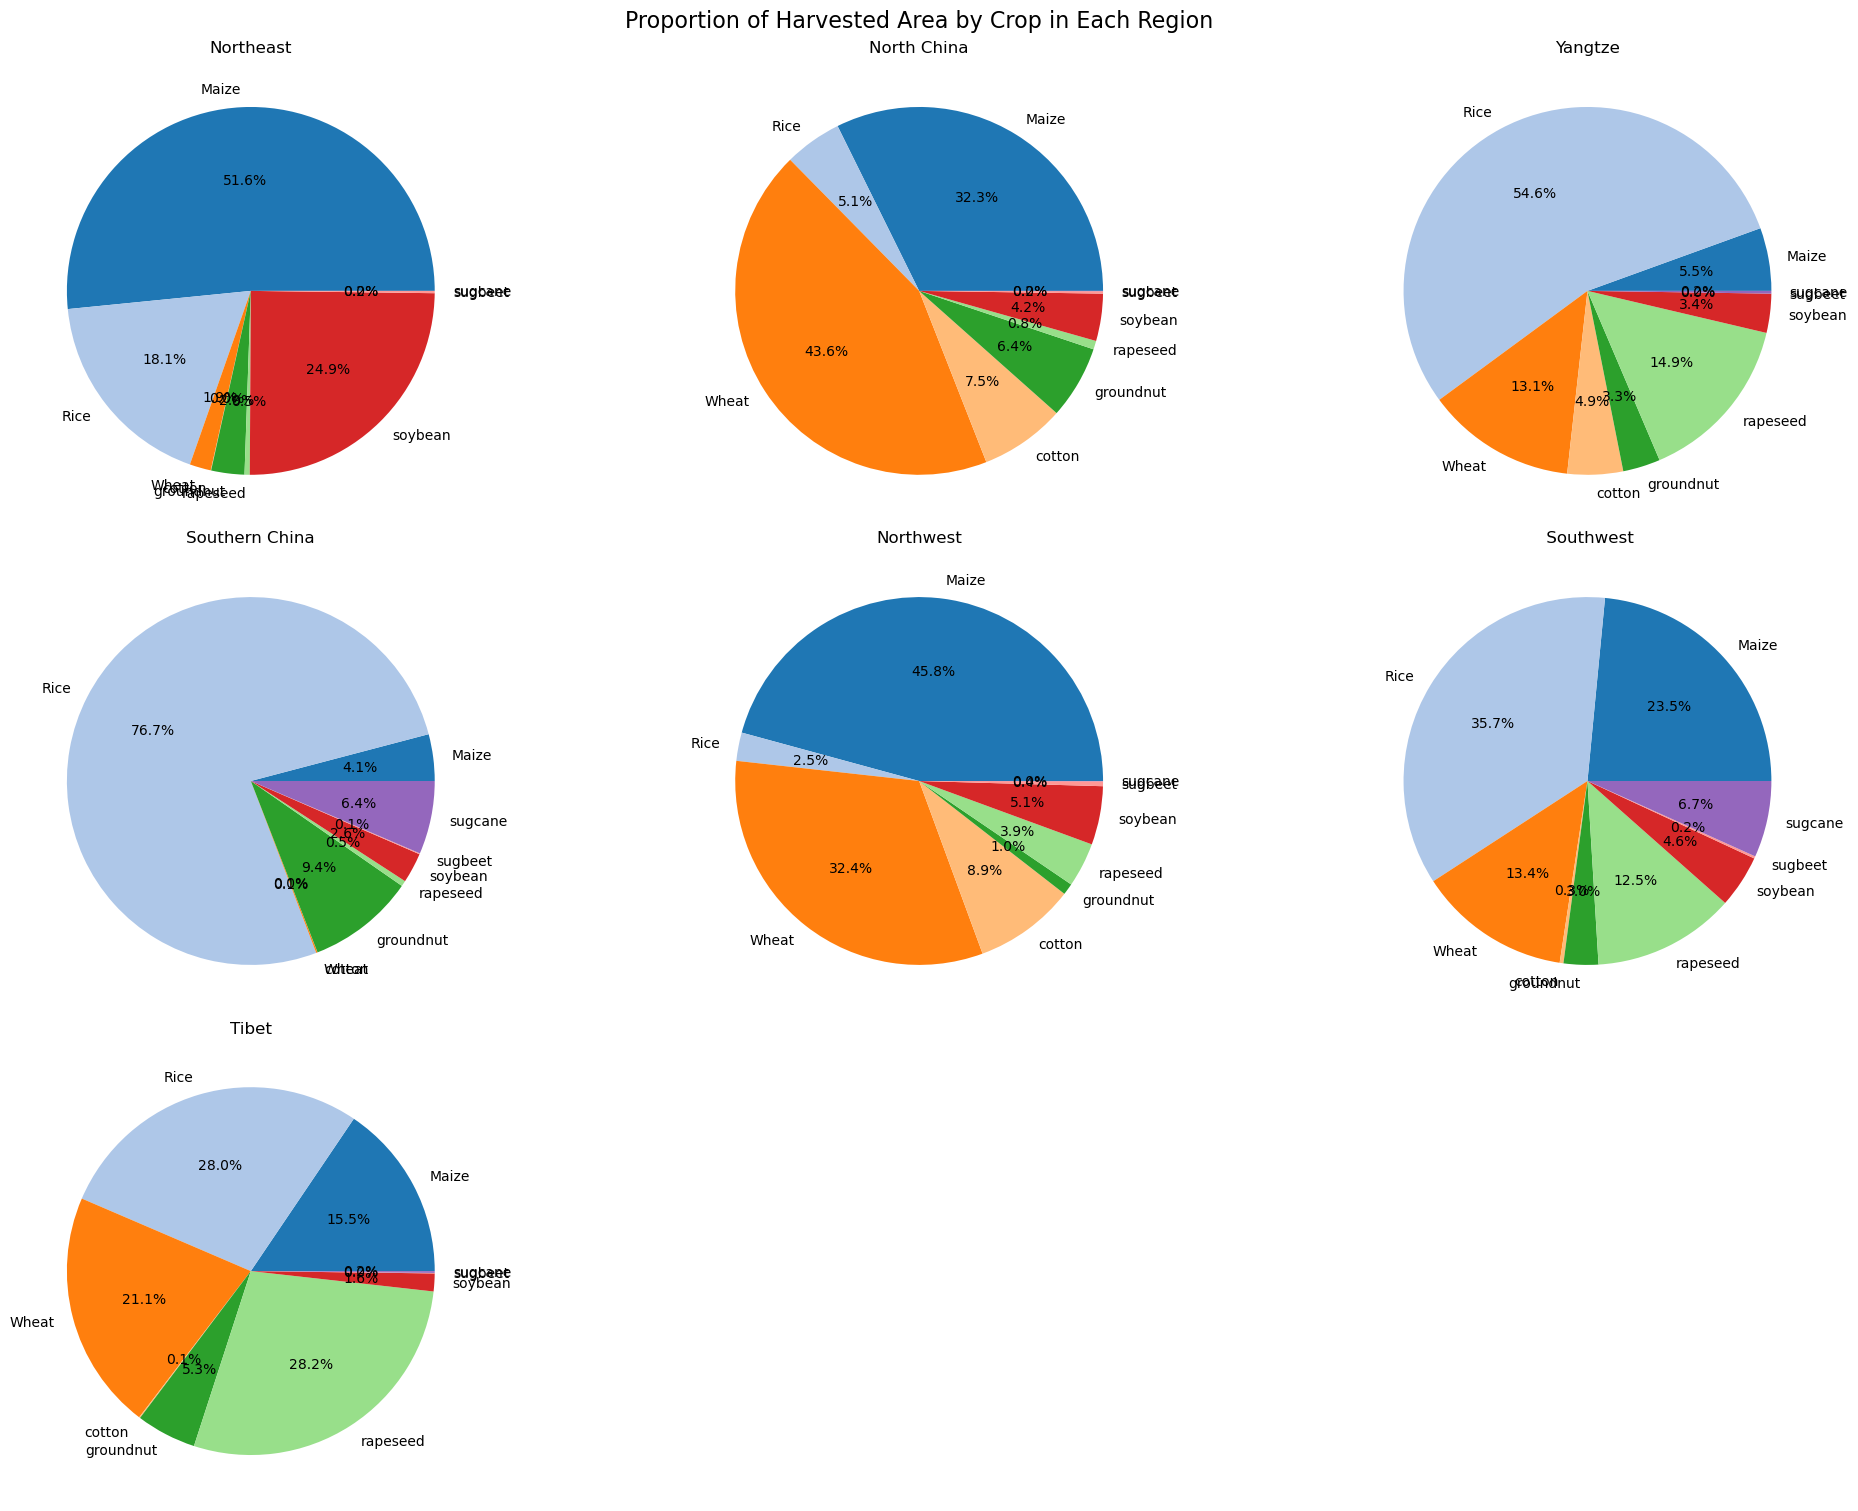

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15), constrained_layout=True)
fig.suptitle('Proportion of Harvested Area by Crop in Each Region', fontsize=16)

region_axes = {
    'Northeast': axes[0, 0],
    'North China': axes[0, 1],
    'Yangtze': axes[0, 2],
    'Southern China': axes[1, 0],
    'Northwest': axes[1, 1],
    ' Southwest': axes[1, 2],
    'Tibet': axes[2, 0]
}

colors = plt.get_cmap('tab20').colors

for region, ax in region_axes.items():
    crop_data = proportion_by_region[region]
    ax.pie(crop_data, labels=crop_data.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(region)

fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.show()


#### G1 scenario: 将优先权分配给单一的可持续性目标

### Objective Function
#### 
$$
Min/max SDG_{Dim}
$$

**说明：** 共8个优化目标（如最小蓝水使用，最大农民收入等）

------------------------------------------------------------------------------------------------------------------------------------------------
### Constraint
#### 公式(13)：作物生产量约束(National Level)

$$
\sum_{\{\mathrm{irr}, \mathrm{rar}\}, i j} \mathrm{CA}_{\mathrm{irr} / \mathrm{r}, i} \cdot x_{\mathrm{irr} / \mathrm{ra}, i, j} \cdot R_{j, z} \cdot \mathrm{YLD}_{\mathrm{irr} / \mathrm{ra}, i, z} \geq \sum_{\text {\{irr,ra\} }} \text { Production }_{\text {Cur, irr } / \mathrm{ra}, z}
$$

**说明**：
保证在所有网格中，所有作物的总产量不少于当前的生产水平。
具体到我们的模拟实验中就是，对于NE, NC, YZ, SC, NW, SW, TB这七个地区，作物转换后每一种作物的总产量不少于当前的生产水平。

模拟实验中我们假设$R_{i,j} = 1$,即假设所有作物都是一年一轮



In [20]:
df_s9['Total Production (kg)'] = df_s9['Yield (kg/ha)'] * df_s9['Harvested Area (ha)']

In [21]:
# National level 8种作物的当前的总产量
production_national = df_s9.groupby('Crop')['Total Production (kg)'].sum().reset_index()
production_national

,Crop,Total Production (kg)
0,Maize,177965028457.328735
1,Rice,180083654997.619385
2,Wheat,114417360393.205124
3,cotton,18898238100.95153
4,groundnut,15382343145.36463
5,rapeseed,13174128189.556341
6,soybean,14815603067.837721
7,sugbeet,9026316792.444727
8,sugcane,112783841813.340988


即作物轮转后，全国8种作物的总产量大于等于当前的总产量。

#### 公式(14)：农民收入约束(Grid Level)
$$
 \sum_{irr,ra,j,z} CA_{irr,ra,i,j} \cdot X_{irr,ra,i,j} \cdot R_{j,z} \cdot YLD_{irr,ra,i,z} \cdot NetProfit_z \ge \sum_{irr,ra} TFI_{irr,ra,i} 
$$
**说明**：
保证在所有网格中(这里我们模拟实验中将每一个region视作一个grid），通过农业活动产生的总收入不少于当前的农民总收入。
举个例子，作物转换后，长江平原农民的总收入大于等于当前的总收入。

In [22]:
df_s9['Total income (US$)'] = df_s9['Net Profit (US$/ha)'] * df_s9['Harvested Area (ha)']
df_s9.groupby('Regions')['Total income (US$)'].sum()

Regions
 Southwest         6772941982.060493
North China       18806987282.551975
Northeast          8601680637.090492
Northwest          7318680922.831729
Southern China     1714535347.772261
Tibet                66751334.602762
Yangtze            14326150559.87088
Name: Total income (US$), dtype: object

In [23]:
total_income_by_region = df_s9.groupby('Regions')['Total income (US$)'].sum().reset_index()
total_income_by_region

,Regions,Total income (US$)
0,Southwest,6772941982.060493
1,North China,18806987282.551975
2,Northeast,8601680637.090492
3,Northwest,7318680922.831729
4,Southern China,1714535347.772261
5,Tibet,66751334.602762
6,Yangtze,14326150559.87088


作物轮转后，每个region内农民收入不低于当前收入

#### 公式(15)：资源使用和环境足迹的约束 （National Level）
$$
\sum_{irr,ra,i,j,z} CA_{irr,ra,i,j} \cdot X_{irr,ra,i,j} \cdot R_{j,z} \cdot UI_{Dim,i,z} \ge \sum_{irr,ra,i} CURRENT_{Dim,irr,ra,i} 
$$
**说明**：
确保在每个可持续性维度上的资源使用和环境足迹不低于当前的水平。
我的理解是，比如你要最大化农民收入，那肯定不能优化后比现在收入还低

#### 公式(16)：资源使用和环境足迹的约束 （Grid Level）
$$
\begin{aligned}
& \sum_{\{\text {irr, ra\} }, j, z} \mathrm{CA}_{\text {irr/ra, }, i} \cdot x_{\text {irr/ra, }, j, j} \cdot R_{j, z} \cdot \mathrm{UI}_{\text {Dim }, i, z} \\
& \leq\left\{\begin{array}{l}
\sum_{\text {\{irr,ra\} }} \mathrm{CURRENT}_{\text {Dim,irr/ra, }, i} \mid\left(\operatorname{Ind}_{\text {Dim }, i} \geq \mathrm{BD}_{\text {Dim }, i}\right) \\
\mathrm{UPBOUND}_{\text {Dim }, i} \mid\left(\operatorname{Ind}_{\text {Dim }, i}<\mathrm{BD}_{\text {Dim }, i}\right)
\end{array}\right.
\end{aligned}
$$
**说明**：
对于资源使用和环境足迹，保证在网格级别不超过当前水平，并考虑到可持续性的边界。

这里要对应到具体的Table S12，给了网格级别的一些限制，如：有部分grid蓝水缺失率已经达到boundary 0.2， 那优化别的指标的时候（比如最大化农民收入），添加了这个grid的蓝水用量就不能降低的限制；

但是本次模拟实验没有针对原始数据的72000grid级别的限制，所以在模拟中这个公式可以忽略。



#### 公式(17)：作物种植比例约束
$$
\sum_{j} X_{irr,ra,i,j} \le 1 
$$

**说明**：
确保每个网格中所有作物的种植比例总和不超过1。

#### 公式(18)：耕地和收获土地的面积约束
$$
\sum_{j,z} CA_{irr,ra,i,j} \cdot X_{irr,ra,i,j} \cdot R_{j,z} = \sum_{z} HA_{irr,ra,i,z}
$$

**说明**：
保证耕地和收获土地面积符合现有的土地使用。

#### 公式(19)：总体优化目标
$$
SDG_{Dim} = \sum_{irr,ra,i,j,z} CA_{irr,ra,i,j} \cdot X_{irr,ra,i,j} \cdot R_{j,z} \cdot U1_{Dim,i,z}
$$
**说明**：
针对每一个可持续性维度，实现资源使用的总体优化。



In [24]:
crops = list(crop_data.index)

In [25]:
regions

['Northeast',
 'North China',
 'Yangtze',
 'Southern China',
 'Northwest',
 ' Southwest',
 'Tibet']

In [26]:
proportion_by_region

{'Northeast': Crop
 Maize        0.515785
 Rice         0.180522
 Wheat        0.018751
 cotton       0.000327
 groundnut     0.02916
 rapeseed     0.004582
 soybean      0.248872
 sugbeet      0.002001
 sugcane           0.0
 Name: Harvested Area (ha), dtype: object,
 'North China': Crop
 Maize        0.323136
 Rice         0.050588
 Wheat        0.435823
 cotton       0.074773
 groundnut    0.064226
 rapeseed      0.00755
 soybean      0.041525
 sugbeet      0.002114
 sugcane      0.000266
 Name: Harvested Area (ha), dtype: object,
 'Yangtze': Crop
 Maize        0.055361
 Rice         0.545562
 Wheat        0.131434
 cotton        0.04888
 groundnut    0.032879
 rapeseed     0.149167
 soybean      0.034322
 sugbeet      0.000014
 sugcane       0.00238
 Name: Harvested Area (ha), dtype: object,
 'Southern China': Crop
 Maize        0.040975
 Rice         0.766936
 Wheat        0.001138
 cotton       0.000075
 groundnut    0.094286
 rapeseed     0.004923
 soybean      0.026478
 sugbeet

In [27]:
import pulp as pl
from pulp import *

# 获取唯一的地区和作物名称
regions = df_s9["Regions"].unique()
crops = df_s9["Crop"].unique()

yield_per_ha = {}
net_profit = {}
harvested_area = {}

for region in regions:
    yield_per_ha[region] = df_s9[df_s9["Regions"] == region].set_index("Crop")["Yield (kg/ha)"].to_dict()
    net_profit[region] = df_s9[df_s9["Regions"] == region].set_index("Crop")["Net Profit (US$/ha)"].to_dict()
    harvested_area[region] = df_s9[df_s9["Regions"] == region].set_index("Crop")["Harvested Area (ha)"].sum()  # 总收获面积

In [28]:
df_s9[df_s9["Crop"] == 'Rice']["Total Production (kg)"].sum()

180083654997.6194

In [29]:
production_national

,Crop,Total Production (kg)
0,Maize,177965028457.328735
1,Rice,180083654997.619385
2,Wheat,114417360393.205124
3,cotton,18898238100.95153
4,groundnut,15382343145.36463
5,rapeseed,13174128189.556341
6,soybean,14815603067.837721
7,sugbeet,9026316792.444727
8,sugcane,112783841813.340988


-------------------------------------------------------------------------------------------------------
### 最大农民收入

In [30]:
# 定义线性规划问题
lp1 = pl.LpProblem("Maximize_Farmers_Income_G1", pl.LpMaximize)
# 定义决策变量
x = pl.LpVariable.dicts("Proportion", (regions, crops), lowBound=0, upBound=1.0)

# 目标函数
lp1 += pl.lpSum(x[region][crop] * harvested_area[region] * net_profit[region][crop]
                 for region in regions for crop in crops if crop in yield_per_ha[region])

# 约束条件1：生产量约束
for crop in crops:
    lp1 += pl.lpSum(x[region][crop] * harvested_area[region] * yield_per_ha[region][crop]
                    for region in regions if crop in yield_per_ha[region]) >= df_s9[df_s9["Crop"] == crop]["Total Production (kg)"].sum()
    
# 约束条件2：收入约束
for region in regions:
    lp1 += pl.lpSum(x[region][crop] * harvested_area[region] * net_profit[region][crop]
                    for crop in crops if crop in net_profit[region]) >= df_s9[df_s9["Regions"] == region]["Total income (US$)"].sum()
    
# 约束条件3：每个地区x的和为1
for region in regions:
    lp1 += pl.lpSum(0<= x[region][crop] for crop in crops if crop in yield_per_ha[region]) <= 1    

# 求解模型
lp1.solve()



1

In [31]:
lp1

Maximize_Farmers_Income_G1:
MAXIMIZE
15476411245.687834*Proportion_North_China_Maize + 27128895003.963978*Proportion_North_China_Rice + 11188805626.192162*Proportion_North_China_Wheat + 55049063625.40518*Proportion_North_China_cotton + 45629657560.66548*Proportion_North_China_groundnut + -1739533764.8771648*Proportion_North_China_rapeseed + 12144408845.948269*Proportion_North_China_soybean + 4186252424.8741527*Proportion_North_China_sugbeet + 39471273054.83427*Proportion_North_China_sugcane + 7658200526.617868*Proportion_Northeast_Maize + 17848498823.808468*Proportion_Northeast_Rice + 1656593854.110725*Proportion_Northeast_Wheat + 64494222611.36178*Proportion_Northeast_cotton + 13634361126.947355*Proportion_Northeast_groundnut + -20088670919.968494*Proportion_Northeast_rapeseed + 4127438384.581735*Proportion_Northeast_soybean + 22367727980.255157*Proportion_Northeast_sugbeet + 6988450196.118773*Proportion_Northwest_Maize + 10606535168.150005*Proportion_Northwest_Rice + 1718711210.90155

In [32]:
print("Status:", pl.LpStatus[lp1.status])
for name, constraint in lp1.constraints.items():
    lhs_value = pl.value(constraint)
    print(f"{name}: {lhs_value} Satisfied = {constraint.valid()}")

Status: Optimal
_C1: 1058.7555198669434 Satisfied = True
_C2: -262.7964096069336 Satisfied = False
_C3: 175.396484375 Satisfied = True
_C4: 141.51978492736816 Satisfied = True
_C5: 1.4106159210205078 Satisfied = True
_C6: 74.62470436096191 Satisfied = True
_C7: 68217870003.78717 Satisfied = True
_C8: 41.508440017700195 Satisfied = True
_C9: 573.2121124267578 Satisfied = True
_C10: 39415518294.56266 Satisfied = True
_C11: -52.33521330356598 Satisfied = False
_C12: 56.643341064453125 Satisfied = True
_C13: 6.78700265288353 Satisfied = True
_C14: 870638634.4829638 Satisfied = True
_C15: 53.3772349357605 Satisfied = True
_C16: -0.11076394468545914 Satisfied = False
_C17: 0.0 Satisfied = True
_C18: 2.7755575615628914e-17 Satisfied = False
_C19: 6.999999982437721e-09 Satisfied = False
_C20: 3.000000040054296e-09 Satisfied = False
_C21: 3.999999949322319e-09 Satisfied = False
_C22: 7.0000001142767054e-09 Satisfied = False
_C23: -2.000000026702864e-09 Satisfied = True


In [33]:
maxincome = pd.DataFrame([(region, crop, x[region][crop].varValue) for region in regions for crop in crops if crop in yield_per_ha[region]], columns=["Regions", "Crop", "Fraction"])

In [34]:
maxincome

,Regions,Crop,Fraction
0,Northeast,Wheat,0.000000
1,Northeast,Rice,0.000000
2,Northeast,Maize,0.289905
3,Northeast,soybean,0.000000
4,Northeast,rapeseed,0.000000
...,...,...,...
58,Tibet,rapeseed,0.000000
59,Tibet,groundnut,0.000000
60,Tibet,cotton,0.071718
61,Tibet,sugbeet,0.000000


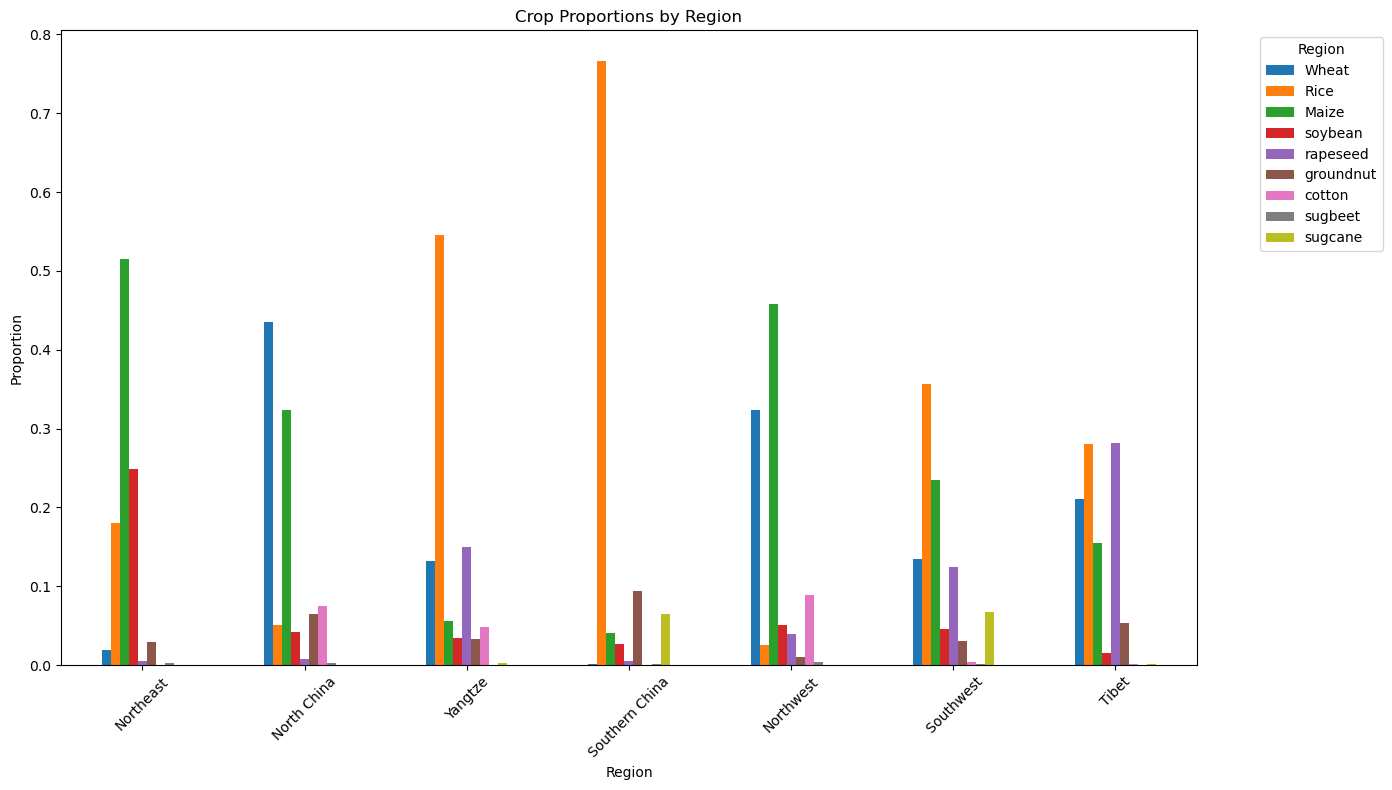

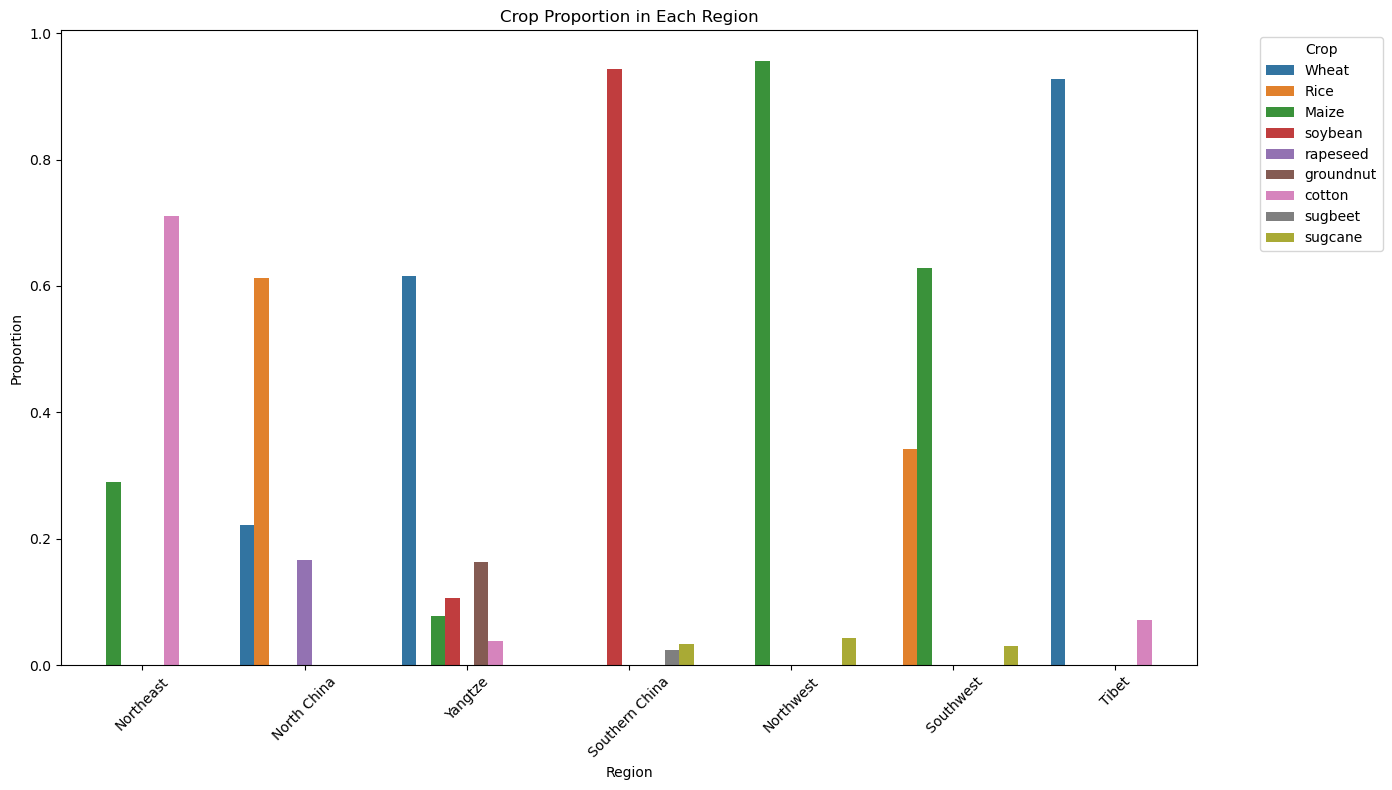

In [35]:
original_df = pd.DataFrame(proportion_by_region).T
original_df = original_df[crops]
original_df

# Plotting
original_df.plot(kind='bar', figsize=(14, 8))
plt.title('Crop Proportions by Region')
plt.ylabel("Proportion")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# 可视化每个地区的作物占比
plt.figure(figsize=(14, 8))
sns.barplot(data=maxincome, x="Regions", y="Fraction", hue="Crop")
plt.title("Crop Proportion in Each Region")
plt.ylabel("Proportion")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

只考虑最大化农民收入的情况下：

- 小麦：从华北，西北转移到长江平原，华北和西藏
- 大米：从长江和华南转移到华北西南
- 玉米：增加在西南，西北的种植比例，降低东北的种植比例
- 大豆：从东北转移到华南
- 油菜籽： 长江平原，西藏，西南降低，华北增加
- 花生：华南减少，长江增加
- 棉花：在东北大量种植棉花，暴利行业
- 甜菜：种的都很少
- 甘蔗：西南华南有所降低

In [36]:
df_maxincome = df_s9.copy()
df_maxincome.drop(columns = ['Total Production (kg)', 'Total income (US$)'], inplace=True)

In [37]:
df_maxincome = pd.merge(df_maxincome, maxincome, how='left', left_on=['Regions', 'Crop'], right_on=['Regions', 'Crop'])

In [38]:
df_maxincome['Harvested Area (ha)'] = df_maxincome.groupby('Regions')['Harvested Area (ha)'].transform('sum') * df_maxincome['Fraction']


In [39]:
df_maxincome['Total Production (kg)'] = df_maxincome['Harvested Area (ha)'] * df_maxincome['Yield (kg/ha)']

In [40]:
df_maxincome[df_maxincome['Crop'] == 'Rice']['Harvested Area (ha)'].sum()

24351224.812611565

In [41]:
df_s9[df_s9['Crop'] == 'Rice']['Harvested Area (ha)'].sum()

29920209.429000005

In [42]:
##转换后温室气体总排放量
df_maxincome['Total GHGs (kg eq CO2)'] = df_maxincome['GHGs (kg eq CO2/ha)'] * df_maxincome['Harvested Area (ha)']

print(df_maxincome['Total GHGs (kg eq CO2)'].sum())


269834949.74023056


In [43]:
##转换前温室气体总排放量
df_s9['Total GHGs (kg eq CO2)'] = df_s9['GHGs (kg eq CO2/ha)'] * df_s9['Harvested Area (ha)']
print(df_s9['Total GHGs (kg eq CO2)'].sum())

314463103.0645101


In [44]:
(269834949.74023056 - 314463103.0645101) / 269834949.74023056 

-0.1653905595522113

In [45]:
##作物转换后农民总收入
df_maxincome['New Income (US$)'] = df_maxincome['Harvested Area (ha)'] * df_maxincome['Net Profit (US$/ha)']
income_maxincome = df_maxincome.groupby('Regions').agg({
    'New Income (US$)': 'sum'
}).reset_index()
print(income_maxincome['New Income (US$)'].sum())

97893885060.18784


In [46]:
##原始农民总收入
df_s9['Total income (US$)'].sum()


57607728066.78059

In [47]:
(97893885060.18784 - 57607728066.78059)/ 57607728066.78059

0.6993186217430124

最大化农民收入的情况下，可以提高农民收入70%


-------------------------------------------------------------------------------------------------------
### G2 场景： 最大化农民收入的情况下，其他可持续指标不能比现在差

In [48]:
yield_per_ha = {}
net_profit = {}
harvested_area = {}
green_water = {}
blue_water = {}
ghg_emissions = {}
nitrogen_use = {}
phosphorus_use = {}
potassium_use = {}
pesticides_use = {}

for region in regions:
    region_data = df_s9[df_s9["Regions"] == region].set_index("Crop")
    yield_per_ha[region] = region_data["Yield (kg/ha)"].to_dict()
    net_profit[region] = region_data["Net Profit (US$/ha)"].to_dict()
    harvested_area[region] = df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"].sum()
    green_water[region] = region_data["Green Water (m3/ha)"].to_dict()
    blue_water[region] = region_data["Blue Water (m3/ha)"].to_dict()
    ghg_emissions[region] = region_data["GHGs (kg eq CO2/ha)"].to_dict()
    nitrogen_use[region] = region_data["Nitrogen (kg N/ha)"].to_dict()
    phosphorus_use[region] = region_data["Phosphorus (kg P2O5/ha)"].to_dict()
    potassium_use[region] = region_data["Potash (kg K2O/ha)"].to_dict()
    pesticides_use[region] = region_data["Pesticides (kg/ha)"].to_dict()

In [49]:
# 定义线性规划问题
lp2 = pl.LpProblem("Maximize_Farmers_Income_G2", pl.LpMaximize)
x = pl.LpVariable.dicts("Proportion", (regions, crops), lowBound=0, upBound=1.0)

# 目标函数不变:仍为最大化农民收入
lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * net_profit[region][crop]
                 for region in regions for crop in crops if crop in yield_per_ha[region])
# 约束条件1：生产量约束
for crop in crops:
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * yield_per_ha[region][crop]
                    for region in regions if crop in yield_per_ha[region]) >= df_s9[df_s9["Crop"] == crop]["Total Production (kg)"].sum()
# 约束条件2：收入约束
for region in regions:
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * net_profit[region][crop]
                    for crop in crops if crop in net_profit[region]) >= df_s9[df_s9["Regions"] == region]["Total income (US$)"].sum()
# 约束条件3：每个地区x的和为1
for region in regions:
    lp2 += pl.lpSum(x[region][crop] for crop in crops if crop in yield_per_ha[region]) <= 1

# 计算每个指标的全国总使用量
total_green_water = sum(df_s9["Green Water (m3/ha)"] * df_s9["Harvested Area (ha)"])
total_blue_water = sum(df_s9["Blue Water (m3/ha)"] * df_s9["Harvested Area (ha)"])
total_ghg_emissions = sum(df_s9["GHGs (kg eq CO2/ha)"] * df_s9["Harvested Area (ha)"])
total_nitrogen_use = sum(df_s9["Nitrogen (kg N/ha)"] * df_s9["Harvested Area (ha)"])
total_phosphorus_use = sum(df_s9["Phosphorus (kg P2O5/ha)"] * df_s9["Harvested Area (ha)"])
total_potassium_use = sum(df_s9["Potash (kg K2O/ha)"] * df_s9["Harvested Area (ha)"])
total_pesticides_use = sum(df_s9["Pesticides (kg/ha)"] * df_s9["Harvested Area (ha)"])

lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * green_water[region][crop]
                for region in regions for crop in crops if crop in green_water[region]) <= total_green_water, "Total_Green_Water"
lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * blue_water[region][crop]
                for region in regions for crop in crops if crop in blue_water[region]) <= total_blue_water, "Total_Blue_Water"
lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * ghg_emissions[region][crop]
                for region in regions for crop in crops if crop in ghg_emissions[region]) <= total_ghg_emissions, "Total_GHGs"
lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * nitrogen_use[region][crop]
                for region in regions for crop in crops if crop in nitrogen_use[region]) <= total_nitrogen_use, "Total_Nitrogen_Use"
lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * phosphorus_use[region][crop]
                for region in regions for crop in crops if crop in phosphorus_use[region]) <= total_phosphorus_use, "Total_Phosphorus_Use"
lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * potassium_use[region][crop]
                for region in regions for crop in crops if crop in potassium_use[region]) <= total_potassium_use, "Total_Potassium_Use"
lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * pesticides_use[region][crop]
                for region in regions for crop in crops if crop in pesticides_use[region]) <= total_pesticides_use, "Total_Pesticides_Use"


for region in regions:
    # 计算原始区域级别的总量
    original_income = df_s9[df_s9["Regions"] == region]["Total income (US$)"].sum()
    original_green_water = sum(df_s9[df_s9["Regions"] == region]["Green Water (m3/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
    original_blue_water = sum(df_s9[df_s9["Regions"] == region]["Blue Water (m3/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
    original_ghg_emissions = sum(df_s9[df_s9["Regions"] == region]["GHGs (kg eq CO2/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
    original_nitrogen_use = sum(df_s9[df_s9["Regions"] == region]["Nitrogen (kg N/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
    original_phosphorus_use = sum(df_s9[df_s9["Regions"] == region]["Phosphorus (kg P2O5/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
    original_potassium_use = sum(df_s9[df_s9["Regions"] == region]["Potash (kg K2O/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
    original_pesticides_use = sum(df_s9[df_s9["Regions"] == region]["Pesticides (kg/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])

    # 添加区域级别的约束条件
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * net_profit[region][crop]
                    for crop in crops if crop in net_profit[region]) >= original_income, f"Income_Constraint_{region}"
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * green_water[region][crop]
                    for crop in crops if crop in green_water[region]) <= original_green_water, f"Green_Water_Constraint_{region}"
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * blue_water[region][crop]
                    for crop in crops if crop in blue_water[region]) <= original_blue_water, f"Blue_Water_Constraint_{region}"
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * ghg_emissions[region][crop]
                    for crop in crops if crop in ghg_emissions[region]) <= original_ghg_emissions, f"GHG_Constraint_{region}"
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * nitrogen_use[region][crop]
                    for crop in crops if crop in nitrogen_use[region]) <= original_nitrogen_use, f"Nitrogen_Constraint_{region}"
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * phosphorus_use[region][crop]
                    for crop in crops if crop in phosphorus_use[region]) <= original_phosphorus_use, f"Phosphorus_Constraint_{region}"
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * potassium_use[region][crop]
                    for crop in crops if crop in potassium_use[region]) <= original_potassium_use, f"Potassium_Constraint_{region}"
    lp2 += pl.lpSum(x[region][crop] * harvested_area[region] * pesticides_use[region][crop]
                    for crop in crops if crop in pesticides_use[region]) <= original_pesticides_use, f"Pesticides_Constraint_{region}"


lp2.solve()

1

In [50]:
print("Status:", pl.LpStatus[lp2.status])
for name, constraint in lp2.constraints.items():
    lhs_value = pl.value(constraint)
    print(f"{name}: {lhs_value} Satisfied = {constraint.valid()}")

Status: Optimal
_C1: 516.8835784196854 Satisfied = True
_C2: -107.42648315429688 Satisfied = False
_C3: 250.71218490600586 Satisfied = True
_C4: -33.066679656505585 Satisfied = False
_C5: -114.88432216644287 Satisfied = False
_C6: 2597597557.5188546 Satisfied = True
_C7: 3960419341.3171215 Satisfied = True
_C8: 0.889305591583252 Satisfied = True
_C9: -50.98822021484375 Satisfied = False
_C10: 1878373762.656412 Satisfied = True
_C11: -53.17070770263672 Satisfied = False
_C12: -32.681281328201294 Satisfied = False
_C13: 54513142.192191124 Satisfied = True
_C14: 1279325005.2884707 Satisfied = True
_C15: 562998062.4178293 Satisfied = True
_C16: -0.10419067554175854 Satisfied = False
_C17: -0.13482454100000002 Satisfied = True
_C18: 4.000000025650152e-09 Satisfied = False
_C19: -9.999999786569624e-10 Satisfied = True
_C20: 1.1999999466327793e-09 Satisfied = False
_C21: -0.06777680850000004 Satisfied = True
_C22: -6.999999919987676e-09 Satisfied = True
_C23: -3.0000000469931898e-09 Satisfied

In [51]:
maxincome_G2 = pd.DataFrame([(region, crop, x[region][crop].varValue) for region in regions for crop in crops if crop in yield_per_ha[region]], columns=["Regions", "Crop", "Fraction"])

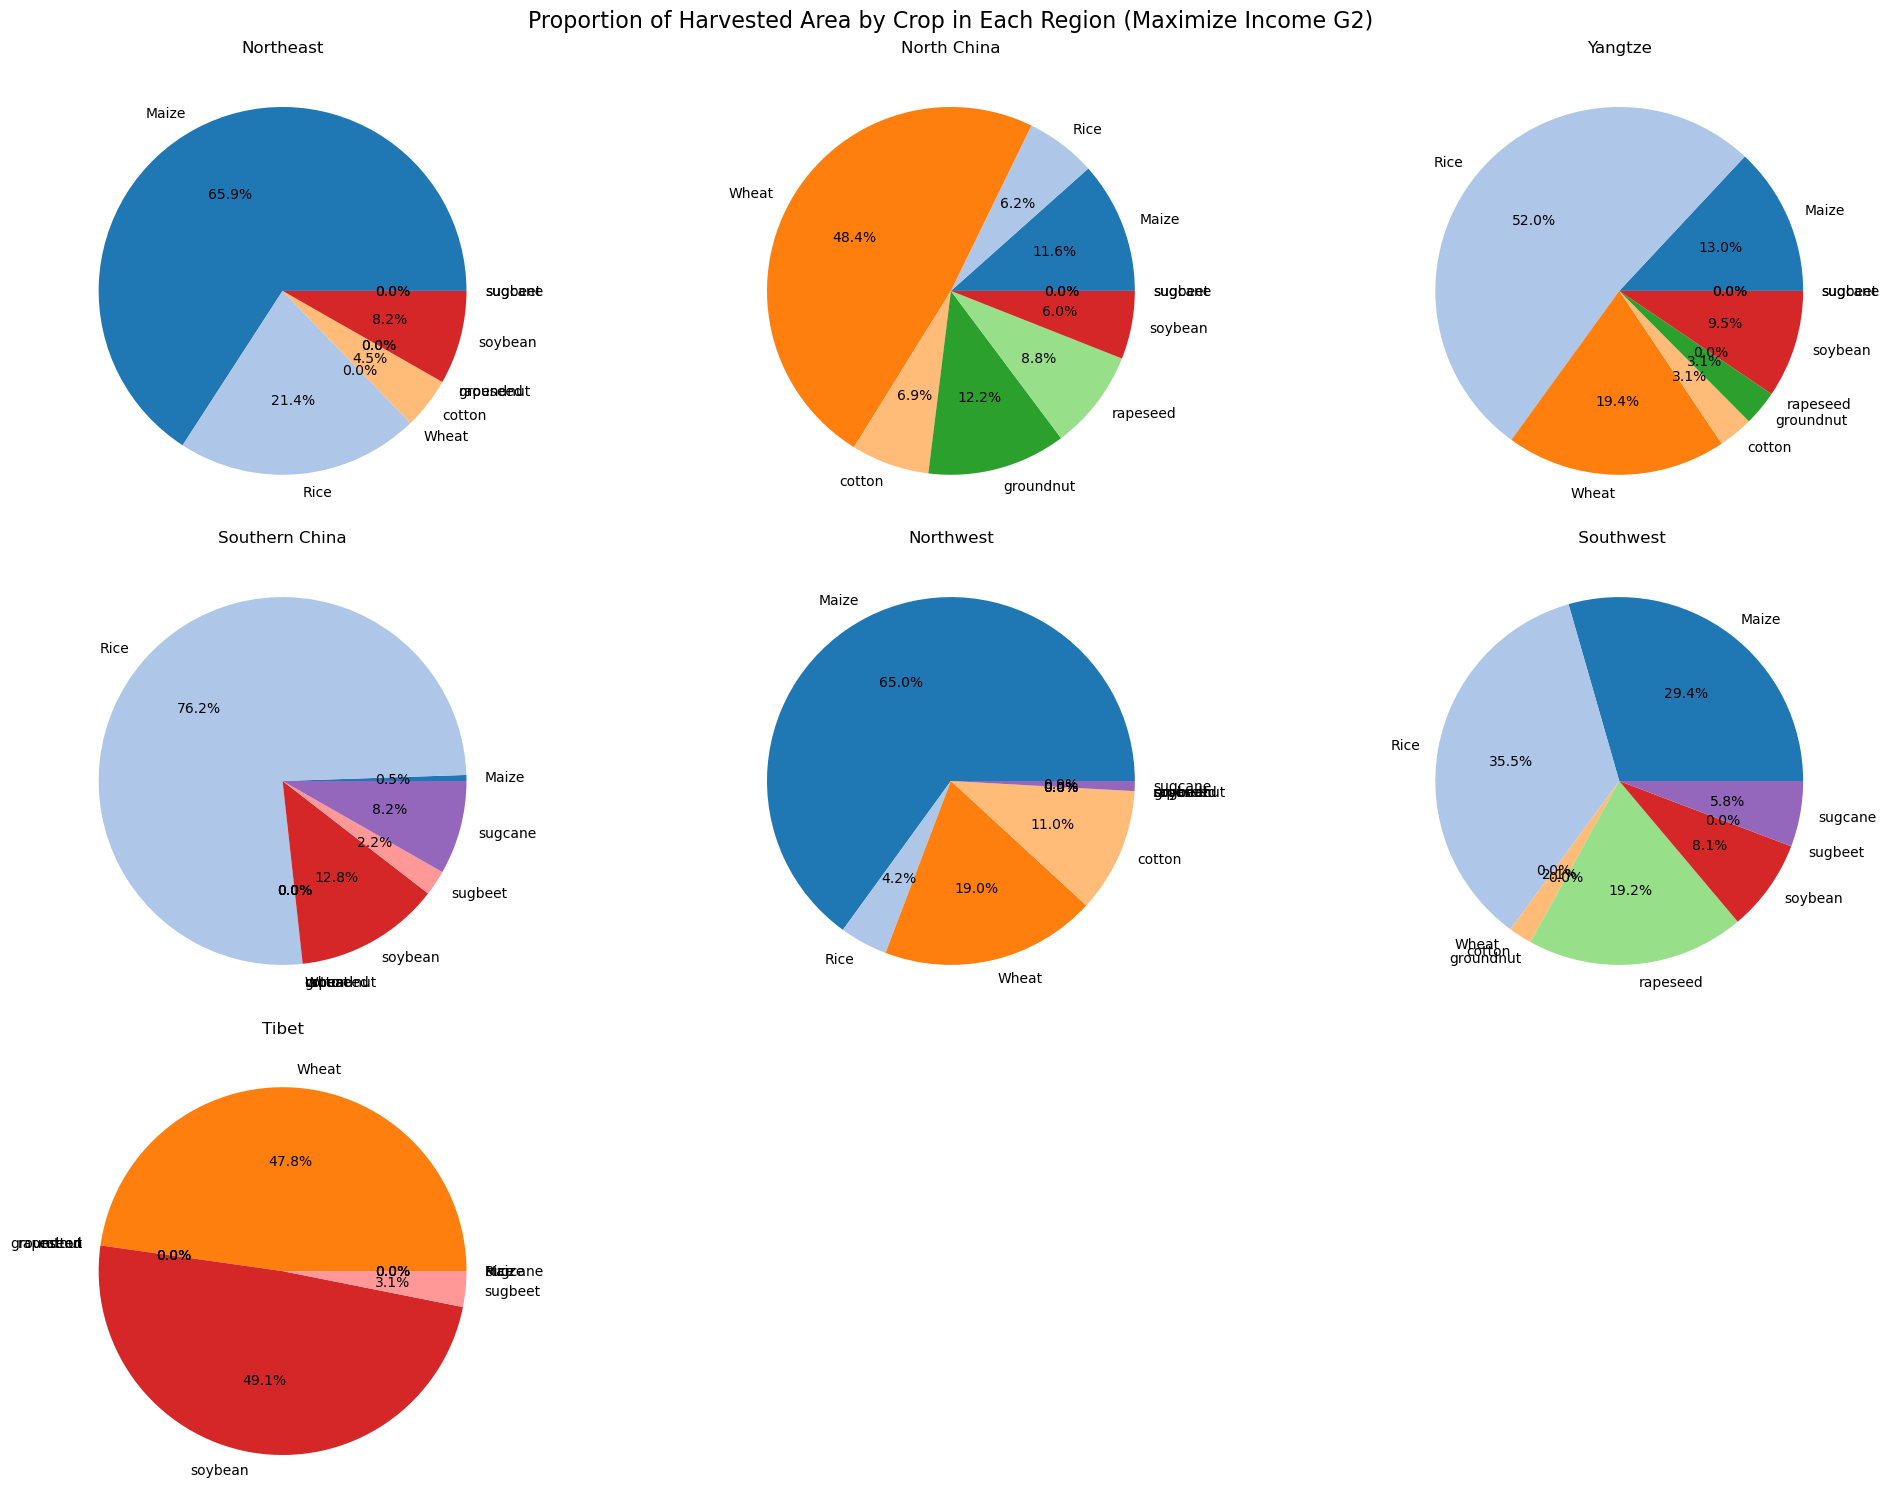

In [52]:

# 创建一个新列计算总面积
maxincome_G2['Harvested Area (ha)'] = maxincome_G2.apply(lambda row: row['Fraction'] * harvested_area[row['Regions']], axis=1)

# 按区域和作物分组
proportion_by_region_maxincome_G2 = maxincome_G2.groupby(['Regions', 'Crop'])['Harvested Area (ha)'].sum().unstack().fillna(0)

# 可视化
fig, axes = plt.subplots(3, 3, figsize=(20, 15), constrained_layout=True)
fig.suptitle('Proportion of Harvested Area by Crop in Each Region (Maximize Income G2)', fontsize=16)

region_axes = {
    'Northeast': axes[0, 0],
    'North China': axes[0, 1],
    'Yangtze': axes[0, 2],
    'Southern China': axes[1, 0],
    'Northwest': axes[1, 1],
    ' Southwest': axes[1, 2],
    'Tibet': axes[2, 0]
}

colors = plt.get_cmap('tab20').colors

for region, ax in region_axes.items():
    if region in proportion_by_region_maxincome_G2.index:
        crop_data = proportion_by_region_maxincome_G2.loc[region]
        ax.pie(crop_data, labels=crop_data.index, autopct='%1.1f%%', colors=colors)
        ax.set_title(region)

# 移除多余的子图
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.show()


In [53]:
original_total_green_water = sum(df_s9["Green Water (m3/ha)"] * df_s9["Harvested Area (ha)"])
original_total_blue_water = sum(df_s9["Blue Water (m3/ha)"] * df_s9["Harvested Area (ha)"])
original_total_ghg_emissions = sum(df_s9["GHGs (kg eq CO2/ha)"] * df_s9["Harvested Area (ha)"])
original_total_nitrogen_use = sum(df_s9["Nitrogen (kg N/ha)"] * df_s9["Harvested Area (ha)"])
original_total_phosphorus_use = sum(df_s9["Phosphorus (kg P2O5/ha)"] * df_s9["Harvested Area (ha)"])
original_total_potassium_use = sum(df_s9["Potash (kg K2O/ha)"] * df_s9["Harvested Area (ha)"])
original_total_pesticides_use = sum(df_s9["Pesticides (kg/ha)"] * df_s9["Harvested Area (ha)"])
original_total_farmer_income = sum(df_s9["Net Profit (US$/ha)"] * df_s9["Harvested Area (ha)"])

In [54]:
optimized_total_green_water = sum(maxincome_G2.apply(lambda row: row['Fraction'] * green_water[row['Regions']][row['Crop']] * harvested_area[row['Regions']], axis=1))
optimized_total_blue_water = sum(maxincome_G2.apply(lambda row: row['Fraction'] * blue_water[row['Regions']][row['Crop']] * harvested_area[row['Regions']], axis=1))
optimized_total_ghg_emissions = sum(maxincome_G2.apply(lambda row: row['Fraction'] * ghg_emissions[row['Regions']][row['Crop']] * harvested_area[row['Regions']], axis=1))
optimized_total_nitrogen_use = sum(maxincome_G2.apply(lambda row: row['Fraction'] * nitrogen_use[row['Regions']][row['Crop']] * harvested_area[row['Regions']], axis=1))
optimized_total_phosphorus_use = sum(maxincome_G2.apply(lambda row: row['Fraction'] * phosphorus_use[row['Regions']][row['Crop']] * harvested_area[row['Regions']], axis=1))
optimized_total_potassium_use = sum(maxincome_G2.apply(lambda row: row['Fraction'] * potassium_use[row['Regions']][row['Crop']] * harvested_area[row['Regions']], axis=1))
optimized_total_pesticides_use = sum(maxincome_G2.apply(lambda row: row['Fraction'] * pesticides_use[row['Regions']][row['Crop']] * harvested_area[row['Regions']], axis=1))
optimized_total_farmer_income = sum(maxincome_G2.apply(lambda row: row['Fraction'] * net_profit[row['Regions']][row['Crop']] * harvested_area[row['Regions']], axis=1))


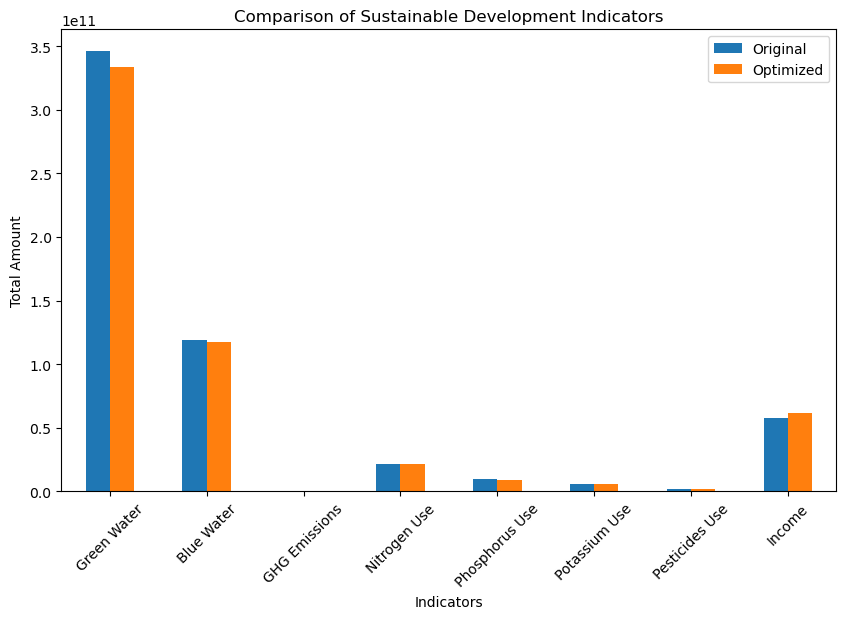

In [55]:
comparison_df = pd.DataFrame({
    'Indicator': ['Green Water', 'Blue Water', 'GHG Emissions', 'Nitrogen Use', 'Phosphorus Use', 'Potassium Use', 'Pesticides Use','Income'],
    'Original': [original_total_green_water, original_total_blue_water, original_total_ghg_emissions, original_total_nitrogen_use, original_total_phosphorus_use, original_total_potassium_use, original_total_pesticides_use, original_total_farmer_income],
    'Optimized': [optimized_total_green_water, optimized_total_blue_water, optimized_total_ghg_emissions, optimized_total_nitrogen_use, optimized_total_phosphorus_use, optimized_total_potassium_use, optimized_total_pesticides_use,optimized_total_farmer_income]
})

# 绘制对比图
fig, ax = plt.subplots(figsize=(10, 6))
comparison_df.plot(kind='bar', x='Indicator', ax=ax)
plt.title('Comparison of Sustainable Development Indicators')
plt.ylabel('Total Amount')
plt.xlabel('Indicators')
plt.xticks(rotation=45)
plt.show()

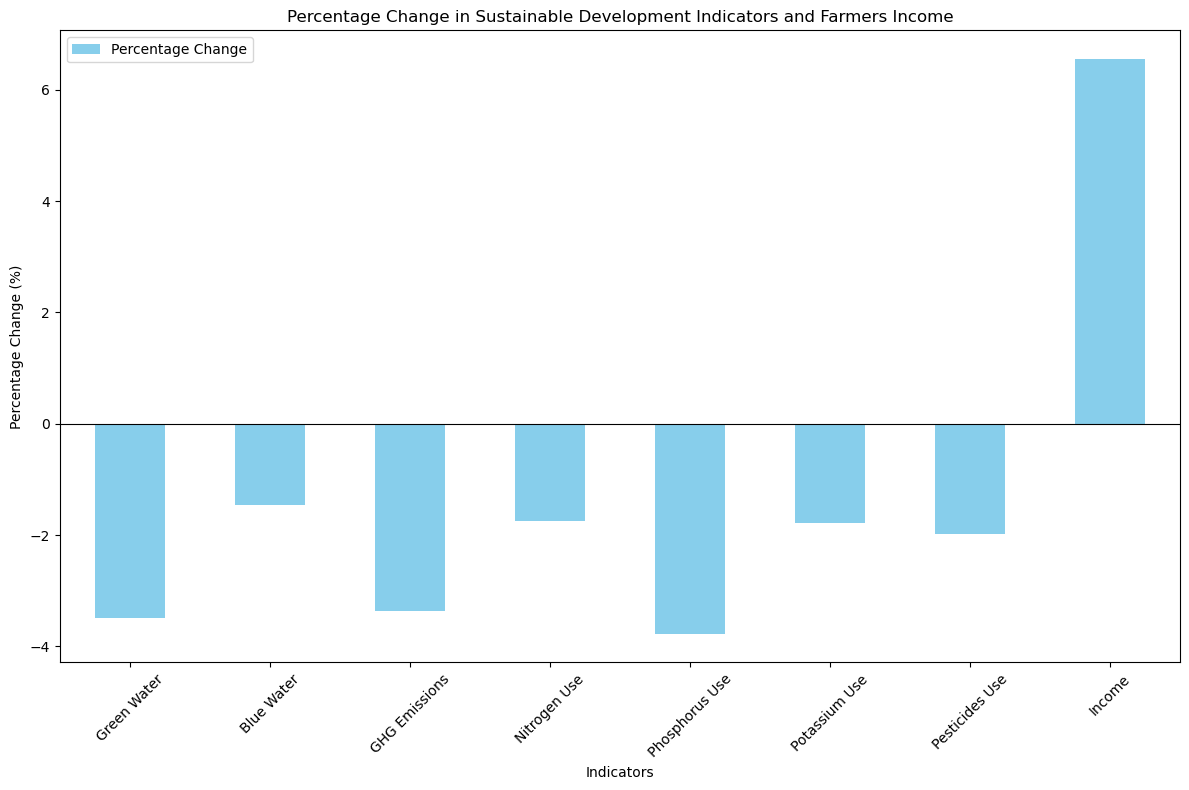

In [56]:
# 计算百分比变化
comparison_df['Percentage Change'] = ((comparison_df['Optimized'] - comparison_df['Original']) / comparison_df['Original']) * 100

# 绘制百分比变化的对比图
fig, ax = plt.subplots(figsize=(12, 8))
comparison_df.plot(kind='bar', x='Indicator', y='Percentage Change', ax=ax, color='skyblue')
plt.title('Percentage Change in Sustainable Development Indicators and Farmers Income')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Indicators')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
plt.tight_layout()

# 显示图表
plt.show()

In [57]:
comparison_df

,Indicator,Original,Optimized,Percentage Change
0,Green Water,3.458116e+11,3.337647e+11,-3.483670
1,Blue Water,1.189306e+11,1.171878e+11,-1.465418
2,GHG Emissions,3.144631e+08,3.038669e+08,-3.369626
3,Nitrogen Use,2.166150e+10,2.128223e+10,-1.750926
4,Phosphorus Use,9.702929e+09,9.336932e+09,-3.772025
5,Potassium Use,5.854137e+09,5.749306e+09,-1.790706
6,Pesticides Use,1.758200e+09,1.723313e+09,-1.984259
7,Income,5.760773e+10,6.138294e+10,6.553305


G2 优化场景下，可以发现各可持续发展指标变化情况如下所示：

-   GW：-3.48%

-   BW：-1.46%
-   GHG：-3.36%
-   NU：-1.75%
-   PU：-3.77%
-   KU：-1.79%
-   Pesticides：-1.98%
-   Income：+6.55%

  总体变化趋势与原论文结果类似，农民收入小幅增加，其他可持续指标小幅下降

### G3 Scenario 中央协同

维度改进值$(G_{Dim})$
$$
G_{\mathrm{Dim}}=\left(1-\frac{\sum_{\{\mathrm{irr}, \mathrm{ra}\}, i, j, z} \mathrm{CA}_{\mathrm{irr} / \mathrm{ra}, i} \cdot x_{\mathrm{irr} / \mathrm{ra}, i, j} \cdot R_{j, z} \cdot \mathrm{UI}_{\mathrm{Dim}, i, z}}{\sum_{\{\mathrm{irr}, \mathrm{ra}\}, i} \mathrm{CURRENT}_{\mathrm{Dim}, \mathrm{irr} / \mathrm{ra}, i}}\right) \times 100 \%
$$
各维度的改进值由当前指标值和优化后的指标值的差异计算得出，表明在实施优化后的改进百分比。

 $$Max \quad Aver(G_{Dim})/Var(G_{Dim})$$

 原文中使用的方法求解该多目标问题的方法应该是加权和法

In the first step, we assign a weight of **0 or 1** to each of the 
seven indicators so that there are **2^7 (128)** crop-switching solutions, each 
of which is Pareto optimal. The weights 0 and 1 represent whether the 
planners consider the corresponding indicator the least or the most 
important, respectively. 

以下详细介绍复现过程：

作者的做法应该是对7个可持续发展指标，赋予不同权重（分别为0或1），然后计算$G_{Dim}$,找到128个解中的$Max \quad Aver(G_{Dim})/Var(G_{Dim})$作为帕累托最优解，这128个解共同组成了帕累托前沿，政策制定者可以根据不同的需要赋予不同指标不同的权重

首先将多目标规划，通过加权和法转为单目标优化
$$
\text { Maximize } \lambda \sum_{i=1}^n G_{\mathrm{Dim}, i}-(1-\lambda) \cdot \operatorname{Var}\left(G_{\mathrm{Dim}}\right)
$$

$$
\operatorname{Var}\left(G_{\text {Dim }}\right)=\frac{1}{n} \sum_{i=1}^n\left(G_{\text {Dim }, i}-\overline{G_{\text {Dim }}}\right)^2
$$

- When $\lambda=0$, the objective function is equivalent to miniminize $Var(G_{Dim})$
- When $\lambda=1$, the objective function is equivalent to maximize $Aver(G_{Dim})$


**关于约束条件，原文中列出的条件与G2场景完全一样**

In [58]:
yield_per_ha = {}
net_profit = {}
harvested_area = {}
green_water = {}
blue_water = {}
ghg_emissions = {}
nitrogen_use = {}
phosphorus_use = {}
potassium_use = {}
pesticides_use = {}

for region in regions:
    region_data = df_s9[df_s9["Regions"] == region].set_index("Crop")
    yield_per_ha[region] = region_data["Yield (kg/ha)"].to_dict()
    net_profit[region] = region_data["Net Profit (US$/ha)"].to_dict()
    harvested_area[region] = df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"].sum()
    green_water[region] = region_data["Green Water (m3/ha)"].to_dict()
    blue_water[region] = region_data["Blue Water (m3/ha)"].to_dict()
    ghg_emissions[region] = region_data["GHGs (kg eq CO2/ha)"].to_dict()
    nitrogen_use[region] = region_data["Nitrogen (kg N/ha)"].to_dict()
    phosphorus_use[region] = region_data["Phosphorus (kg P2O5/ha)"].to_dict()
    potassium_use[region] = region_data["Potash (kg K2O/ha)"].to_dict()
    pesticides_use[region] = region_data["Pesticides (kg/ha)"].to_dict()

# 定义权重组合
weight_combinations = list(itertools.product([0, 1], repeat=7))

In [59]:
# 定义指标数据的列表
indicators = [green_water, blue_water, ghg_emissions, nitrogen_use, phosphorus_use, potassium_use, pesticides_use]
indicator_columns = ["Green Water (m3/ha)", "Blue Water (m3/ha)", "GHGs (kg eq CO2/ha)", "Nitrogen (kg N/ha)", "Phosphorus (kg P2O5/ha)", "Potash (kg K2O/ha)", "Pesticides (kg/ha)"]

# 计算每个指标的全国总使用量
total_indicators = [
    sum(df_s9["Green Water (m3/ha)"] * df_s9["Harvested Area (ha)"]),
    sum(df_s9["Blue Water (m3/ha)"] * df_s9["Harvested Area (ha)"]),
    sum(df_s9["GHGs (kg eq CO2/ha)"] * df_s9["Harvested Area (ha)"]),
    sum(df_s9["Nitrogen (kg N/ha)"] * df_s9["Harvested Area (ha)"]),
    sum(df_s9["Phosphorus (kg P2O5/ha)"] * df_s9["Harvested Area (ha)"]),
    sum(df_s9["Potash (kg K2O/ha)"] * df_s9["Harvested Area (ha)"]),
    sum(df_s9["Pesticides (kg/ha)"] * df_s9["Harvested Area (ha)"])
]

# 计算原始指标总量（用于计算改进值）
original_totals = []
for column in indicator_columns:
    original_total = sum(df_s9[column] * df_s9["Harvested Area (ha)"])
    original_totals.append(original_total)

In [60]:
# 定义权重组合
weight_combinations = list(itertools.product([0, 1], repeat=7))

# 定义指标数据的列表
indicators = [blue_water, green_water, ghg_emissions, phosphorus_use, nitrogen_use, potassium_use, pesticides_use]
indicator_columns = ["Blue Water (m3/ha)", "Green Water (m3/ha)", "GHGs (kg eq CO2/ha)", "Phosphorus (kg P2O5/ha)", "Nitrogen (kg N/ha)", "Potash (kg K2O/ha)", "Pesticides (kg/ha)"]

# 存储结果
all_results = []

# 计算原始指标总量（用于计算改进值）
original_totals = []
for column in indicator_columns:
    original_total = sum(df_s9[column] * df_s9["Harvested Area (ha)"])
    original_totals.append(original_total)

for weights in weight_combinations[:]:
    # 创建线性规划问题
    lp = pl.LpProblem("MultiObjectiveOptimization", pl.LpMinimize)

    # 定义决策变量
    x = pl.LpVariable.dicts("Proportion", (regions, crops), lowBound=0, upBound=1.0)

    # 构建目标函数
    objective = pl.lpSum(weights[i] * pl.lpSum(
        x[region][crop] * harvested_area[region] * indicators[i][region][crop]
        for region in regions for crop in crops if crop in indicators[i][region])
        for i in range(7))
    lp += objective

    # 添加约束条件
    # 约束条件1：生产量约束
    for crop in crops:
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * yield_per_ha[region][crop]
                        for region in regions if crop in yield_per_ha[region]) >= df_s9[df_s9["Crop"] == crop]["Total Production (kg)"].sum(), f"Production_{crop}"

    # 约束条件2：收入约束
    for region in regions:
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * net_profit[region][crop]
                        for crop in crops if crop in net_profit[region]) >= df_s9[df_s9["Regions"] == region]["Total income (US$)"].sum(), f"Income_{region}"

    # 约束条件3：每个地区x的和为1
    for region in regions:
        lp += pl.lpSum(x[region][crop] for crop in crops if crop in yield_per_ha[region]) <= 1, f"Region_{region}_Total"

    # 总指标约束
    lp += pl.lpSum(x[region][crop] * harvested_area[region] * blue_water[region][crop]
                    for region in regions for crop in crops if crop in blue_water[region]) <= sum(df_s9["Blue Water (m3/ha)"] * df_s9["Harvested Area (ha)"]), "Total_Blue_Water"
    lp += pl.lpSum(x[region][crop] * harvested_area[region] * green_water[region][crop]
                    for region in regions for crop in crops if crop in green_water[region]) <= sum(df_s9["Green Water (m3/ha)"] * df_s9["Harvested Area (ha)"]), "Total_Green_Water"
    lp += pl.lpSum(x[region][crop] * harvested_area[region] * ghg_emissions[region][crop]
                    for region in regions for crop in crops if crop in ghg_emissions[region]) <= sum(df_s9["GHGs (kg eq CO2/ha)"] * df_s9["Harvested Area (ha)"]), "Total_GHGs"
    lp += pl.lpSum(x[region][crop] * harvested_area[region] * phosphorus_use[region][crop]
                    for region in regions for crop in crops if crop in phosphorus_use[region]) <= sum(df_s9["Phosphorus (kg P2O5/ha)"] * df_s9["Harvested Area (ha)"]), "Total_Phosphorus_Use"
    lp += pl.lpSum(x[region][crop] * harvested_area[region] * nitrogen_use[region][crop]
                    for region in regions for crop in crops if crop in nitrogen_use[region]) <= sum(df_s9["Nitrogen (kg N/ha)"] * df_s9["Harvested Area (ha)"]), "Total_Nitrogen_Use"
    lp += pl.lpSum(x[region][crop] * harvested_area[region] * potassium_use[region][crop]
                    for region in regions for crop in crops if crop in potassium_use[region]) <= sum(df_s9["Potash (kg K2O/ha)"] * df_s9["Harvested Area (ha)"]), "Total_Potassium_Use"
    lp += pl.lpSum(x[region][crop] * harvested_area[region] * pesticides_use[region][crop]
                    for region in regions for crop in crops if crop in pesticides_use[region]) <= sum(df_s9["Pesticides (kg/ha)"] * df_s9["Harvested Area (ha)"]), "Total_Pesticides_Use"

    for region in regions:
        # 计算原始区域级别的总量
        original_income = df_s9[df_s9["Regions"] == region]["Total income (US$)"].sum()
        original_blue_water = sum(df_s9[df_s9["Regions"] == region]["Blue Water (m3/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
        original_green_water = sum(df_s9[df_s9["Regions"] == region]["Green Water (m3/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
        original_ghg_emissions = sum(df_s9[df_s9["Regions"] == region]["GHGs (kg eq CO2/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
        original_nitrogen_use = sum(df_s9[df_s9["Regions"] == region]["Nitrogen (kg N/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
        original_phosphorus_use = sum(df_s9[df_s9["Regions"] == region]["Phosphorus (kg P2O5/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
        original_potassium_use = sum(df_s9[df_s9["Regions"] == region]["Potash (kg K2O/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])
        original_pesticides_use = sum(df_s9[df_s9["Regions"] == region]["Pesticides (kg/ha)"] * df_s9[df_s9["Regions"] == region]["Harvested Area (ha)"])

        # 添加区域级别的约束条件
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * net_profit[region][crop]
                        for crop in crops if crop in net_profit[region]) >= original_income, f"Income_Constraint_{region}"
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * blue_water[region][crop]
                        for crop in crops if crop in blue_water[region]) <= original_blue_water, f"Blue_Water_Constraint_{region}"
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * green_water[region][crop]
                        for crop in crops if crop in green_water[region]) <= original_green_water, f"Green_Water_Constraint_{region}"
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * ghg_emissions[region][crop]
                        for crop in crops if crop in ghg_emissions[region]) <= original_ghg_emissions, f"GHG_Constraint_{region}"
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * nitrogen_use[region][crop]
                        for crop in crops if crop in nitrogen_use[region]) <= original_nitrogen_use, f"Nitrogen_Constraint_{region}"
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * phosphorus_use[region][crop]
                        for crop in crops if crop in phosphorus_use[region]) <= original_phosphorus_use, f"Phosphorus_Constraint_{region}"
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * potassium_use[region][crop]
                        for crop in crops if crop in potassium_use[region]) <= original_potassium_use, f"Potassium_Constraint_{region}"
        lp += pl.lpSum(x[region][crop] * harvested_area[region] * pesticides_use[region][crop]
                        for crop in crops if crop in pesticides_use[region]) <= original_pesticides_use, f"Pesticides_Constraint_{region}"

    # 求解问题
    lp.solve()

    # 计算每个指标的改进值和方差
    improvements = [1 - pl.value(pl.lpSum(
        x[region][crop] * harvested_area[region] * indicators[i][region][crop]
        for region in regions for crop in crops if crop in indicators[i][region])) / original_totals[i] for i in range(7)]
    avg_improvement = np.mean(improvements)
    var_improvement = np.var(improvements)

    # 保存当前权重组合和改进值
    result = {
        "weights": weights,
        "avg_improvement": avg_improvement,
        "var_improvement": var_improvement,
        "improvements": improvements,
        "objective_value": avg_improvement / var_improvement if var_improvement != 0 else 0
    }

    # 保存各个区域和作物的比例
    for region in regions:
        for crop in crops:
            result[f"{region}_{crop}_proportion"] = pl.value(x[region][crop])

    all_results.append(result)

# 将结果保存到数据框
df_results = pd.DataFrame(all_results)


In [61]:
df_results

,weights,avg_improvement,var_improvement,improvements,objective_value,Northeast_Wheat_proportion,Northeast_Rice_proportion,Northeast_Maize_proportion,Northeast_soybean_proportion,Northeast_rapeseed_proportion,...,Southwest_sugcane_proportion,Tibet_Wheat_proportion,Tibet_Rice_proportion,Tibet_Maize_proportion,Tibet_soybean_proportion,Tibet_rapeseed_proportion,Tibet_groundnut_proportion,Tibet_cotton_proportion,Tibet_sugbeet_proportion,Tibet_sugcane_proportion
0,"(0, 0, 0, 0, 0, 0, 0)",0.056280,0.000607,"[0.10052758629674696, 0.049510232937182264, 0....",92.666251,0.000000,0.182755,0.604096,0.000000,0.000000,...,0.052933,0.347537,0.0,0.353337,0.274627,0.0,0.000000,0.012863,0.000000,0.0
1,"(0, 0, 0, 0, 0, 0, 1)",0.049440,0.000210,"[0.06452092000962928, 0.049416098699273214, 0....",235.396957,0.141091,0.170179,0.480992,0.000000,0.000000,...,0.056048,0.477716,0.0,0.000000,0.490981,0.0,0.000000,0.000000,0.031303,0.0
2,"(0, 0, 0, 0, 0, 1, 0)",0.037767,0.000394,"[0.03986967055385526, 0.042253157275991216, 0....",95.924154,0.223943,0.162271,0.413065,0.023488,0.000000,...,0.053405,0.475984,0.0,0.017030,0.474268,0.0,0.000000,0.000000,0.032718,0.0
3,"(0, 0, 0, 0, 0, 1, 1)",0.044278,0.000344,"[0.05621075524436425, 0.044661315393913936, 0....",128.666914,0.209346,0.163746,0.422228,0.038896,0.000000,...,0.055009,0.475984,0.0,0.017030,0.474268,0.0,0.000000,0.000000,0.032718,0.0
4,"(0, 0, 0, 0, 1, 0, 0)",0.056249,0.000517,"[0.09516448470615158, 0.05180932399527094, 0.0...",108.825262,0.000000,0.181842,0.615445,0.000000,0.000000,...,0.049910,0.473133,0.0,0.000000,0.489265,0.0,0.034549,0.003053,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,"(1, 1, 1, 1, 0, 1, 1)",0.059288,0.000487,"[0.09700866383972118, 0.05678423085484474, 0.0...",121.721345,0.000000,0.182112,0.612164,0.000000,0.000596,...,0.037213,0.477716,0.0,0.000000,0.490981,0.0,0.000000,0.000000,0.031303,0.0
124,"(1, 1, 1, 1, 1, 0, 0)",0.059271,0.000488,"[0.09695565168305931, 0.056801960645370575, 0....",121.516711,0.000000,0.182044,0.612942,0.000000,0.000000,...,0.037568,0.455360,0.0,0.000000,0.535432,0.0,0.000000,0.009208,0.000000,0.0
125,"(1, 1, 1, 1, 1, 0, 1)",0.059271,0.000488,"[0.09695565168305931, 0.056801960645370575, 0....",121.516711,0.000000,0.182044,0.612942,0.000000,0.000000,...,0.037568,0.455360,0.0,0.000000,0.535432,0.0,0.000000,0.009208,0.000000,0.0
126,"(1, 1, 1, 1, 1, 1, 0)",0.059271,0.000488,"[0.09695565168305931, 0.056801960645370575, 0....",121.516711,0.000000,0.182044,0.612942,0.000000,0.000000,...,0.037568,0.455360,0.0,0.000000,0.535432,0.0,0.000000,0.009208,0.000000,0.0


In [62]:
df_results["objective_value"] = df_results.apply(
    lambda row: row["avg_improvement"] / row["var_improvement"] if row["var_improvement"] != 0 else 0, axis=1
)

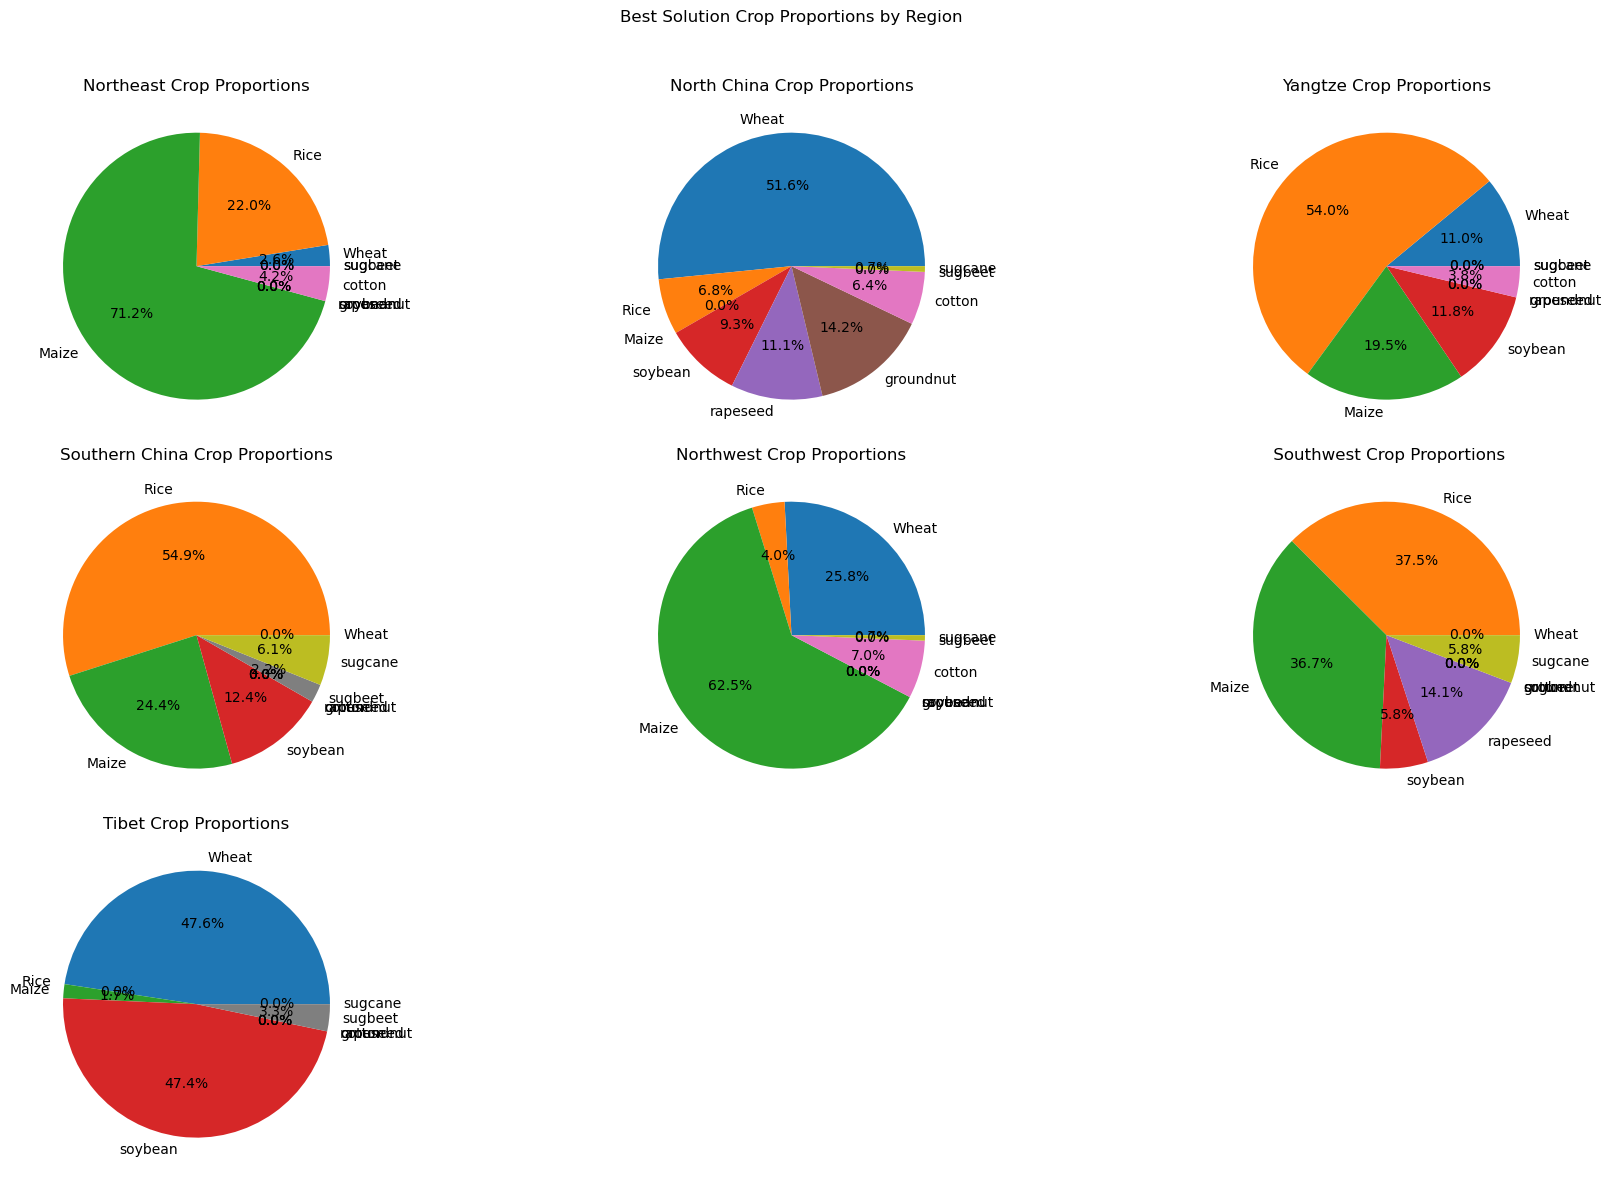

In [63]:
best_solution = df_results.loc[df_results["objective_value"].idxmax()]
best_proportions = {key: best_solution[key] for key in best_solution.keys() if "proportion" in key}
plt.figure(figsize=(18, 12))
for i, region in enumerate(regions):
    plt.subplot(3, 3, i + 1)
    region_proportions = {crop: best_proportions[f"{region}_{crop}_proportion"] for crop in crops if f"{region}_{crop}_proportion" in best_proportions}
    plt.pie(region_proportions.values(), labels=region_proportions.keys(), autopct='%1.1f%%')
    plt.title(f'{region} Crop Proportions')

plt.suptitle('Best Solution Crop Proportions by Region')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [64]:
best_proportions

{'Northeast_Wheat_proportion': 0.020956971,
 'Northeast_Rice_proportion': 0.18097621,
 'Northeast_Maize_proportion': 0.58470808,
 'Northeast_soybean_proportion': 0.0,
 'Northeast_rapeseed_proportion': 0.0,
 'Northeast_groundnut_proportion': 0.0,
 'Northeast_cotton_proportion': 0.034664076,
 'Northeast_sugbeet_proportion': 0.0,
 'Northeast_sugcane_proportion': 0.0,
 'North China_Wheat_proportion': 0.51577638,
 'North China_Rice_proportion': 0.067579837,
 'North China_Maize_proportion': 0.0,
 'North China_soybean_proportion': 0.093108895,
 'North China_rapeseed_proportion': 0.11089,
 'North China_groundnut_proportion': 0.14158772,
 'North China_cotton_proportion': 0.064163624,
 'North China_sugbeet_proportion': 0.0,
 'North China_sugcane_proportion': 0.0068935444,
 'Yangtze_Wheat_proportion': 0.10992353,
 'Yangtze_Rice_proportion': 0.53953468,
 'Yangtze_Maize_proportion': 0.19515629,
 'Yangtze_soybean_proportion': 0.11773114,
 'Yangtze_rapeseed_proportion': 0.0,
 'Yangtze_groundnut_propo

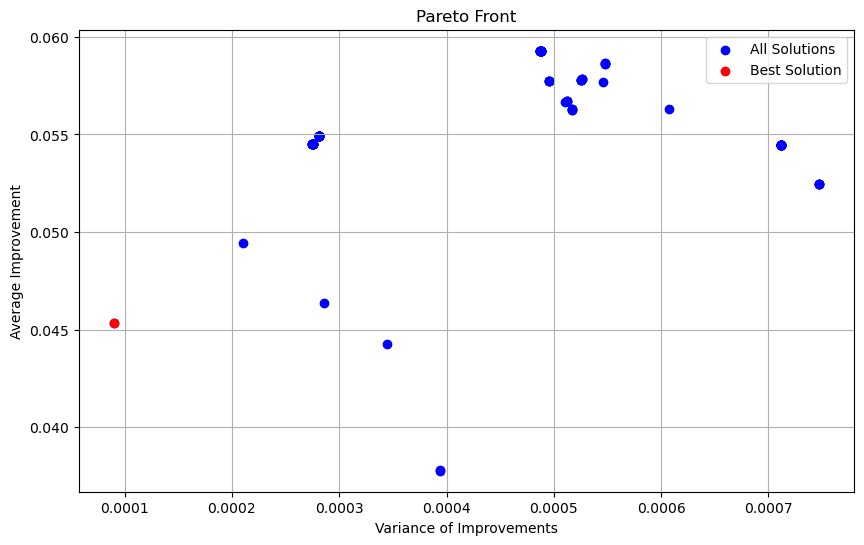

In [65]:
# 绘制帕累托前沿
plt.figure(figsize=(10, 6))
plt.scatter(df_results["var_improvement"], df_results["avg_improvement"], c='blue', label='All Solutions')
plt.xlabel("Variance of Improvements")
plt.ylabel("Average Improvement")
plt.title("Pareto Front")
plt.legend()
plt.grid(True)

# 标记最大目标函数值的点
best_solution = df_results.loc[df_results["objective_value"].idxmax()]
plt.scatter(best_solution["var_improvement"], best_solution["avg_improvement"], c='red', label='Best Solution')
plt.legend()

plt.show()

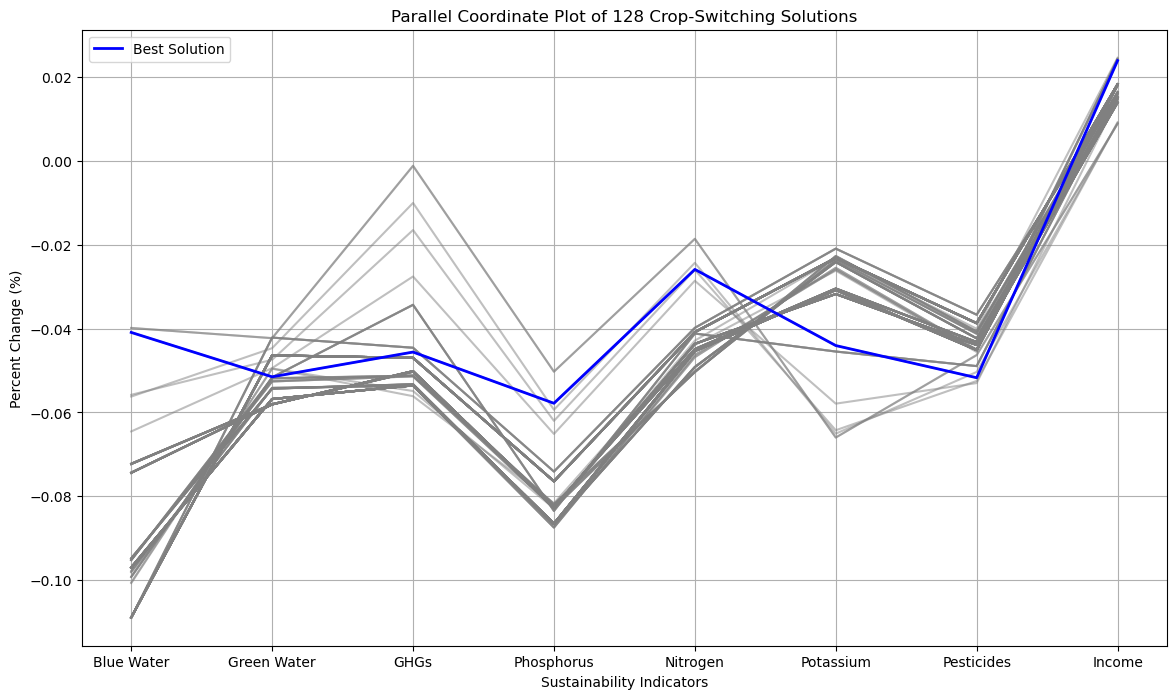

In [66]:
# 提取指标改进值和权重组合
improvements = df_results[["weights", "avg_improvement", "var_improvement", "objective_value"]]
indicators = ["Blue Water (m3/ha)", "Green Water (m3/ha)", "GHGs (kg eq CO2/ha)", "Phosphorus (kg P2O5/ha)", "Nitrogen (kg N/ha)", "Potash (kg K2O/ha)", "Pesticides (kg/ha)", "Net Profit (US$/ha)"]

# 计算每个指标的改进值
def calculate_gdim(row, indicators, original_totals):
    proportions = {key: row[key] for key in row.keys() if "proportion" in key}
    gdim_values = []
    for i, indicator in enumerate(indicators):
        total_new = 0
        for region in regions:
            for crop in crops:
                key = f"{region}_{crop}_proportion"
                if key in proportions:
                    total_new += proportions[key] * harvested_area[region] * df_s9[(df_s9["Regions"] == region) & (df_s9["Crop"] == crop)][indicator].values[0]
        gdim = 1 - total_new / original_totals[i]
        gdim_values.append(gdim)
    return gdim_values

# 计算原始指标总量
original_totals = [sum(df_s9[indicator] * df_s9["Harvested Area (ha)"]) for indicator in indicators]

# 添加 G_dim 列
df_results["G_dim"] = df_results.apply(lambda row: calculate_gdim(row, indicators, original_totals), axis=1)

# 将 G_dim 分解为单独的列并取相反数
gdim_columns = ["Blue Water", "Green Water", "GHGs", "Phosphorus", "Nitrogen", "Potassium", "Pesticides", "Income"]
df_gdim = pd.DataFrame(df_results["G_dim"].tolist(), columns=gdim_columns)

# 对前七个指标取相反数
for col in gdim_columns[:]:
    df_gdim[col] = -df_gdim[col]

# 绘制并行坐标图
plt.figure(figsize=(14, 8))
for i in range(len(df_gdim)):
    plt.plot(gdim_columns, df_gdim.iloc[i], color='gray', alpha=0.5)

# 高亮显示目标函数值最大的解决方案
best_solution_index = df_results["objective_value"].idxmax()
plt.plot(gdim_columns, df_gdim.iloc[best_solution_index], color='blue', linewidth=2, label='Best Solution')

# 添加图例和标签
plt.xlabel("Sustainability Indicators")
plt.ylabel("Percent Change (%)")
plt.title("Parallel Coordinate Plot of 128 Crop-Switching Solutions")
plt.legend()
plt.grid(True)

# 显示图表
plt.show()


---------------------------------------------------------------------------------------------------------------------------------------------------------

In [81]:
df_gdim.min()

Blue Water    -0.108936
Green Water   -0.058075
GHGs          -0.056111
Phosphorus    -0.087433
Nitrogen      -0.050374
Potassium     -0.065972
Pesticides    -0.052987
Income         0.008830
dtype: float64

In [82]:
df_gdim.max()

Blue Water    -0.039827
Green Water   -0.042139
GHGs          -0.001141
Phosphorus    -0.050248
Nitrogen      -0.018565
Potassium     -0.020929
Pesticides    -0.036687
Income         0.024593
dtype: float64

In [71]:
# 定义字典来存储原始比例
original_proportions = {}

# 计算每个地区的总收获面积
total_harvested_area = df_s9.groupby("Regions")["Harvested Area (ha)"].sum()

# 计算每个地区和作物的原始比例
for region in regions:
    region_data = df_s9[df_s9["Regions"] == region]
    original_proportions[region] = {}
    for crop in crops:
        crop_area = region_data[region_data["Crop"] == crop]["Harvested Area (ha)"].sum()
        total_area = total_harvested_area[region]
        original_proportions[region][crop] = crop_area / total_area if total_area != 0 else 0



In [72]:
best_proportions = {key: best_solution[key] for key in best_solution.keys() if "proportion" in key}

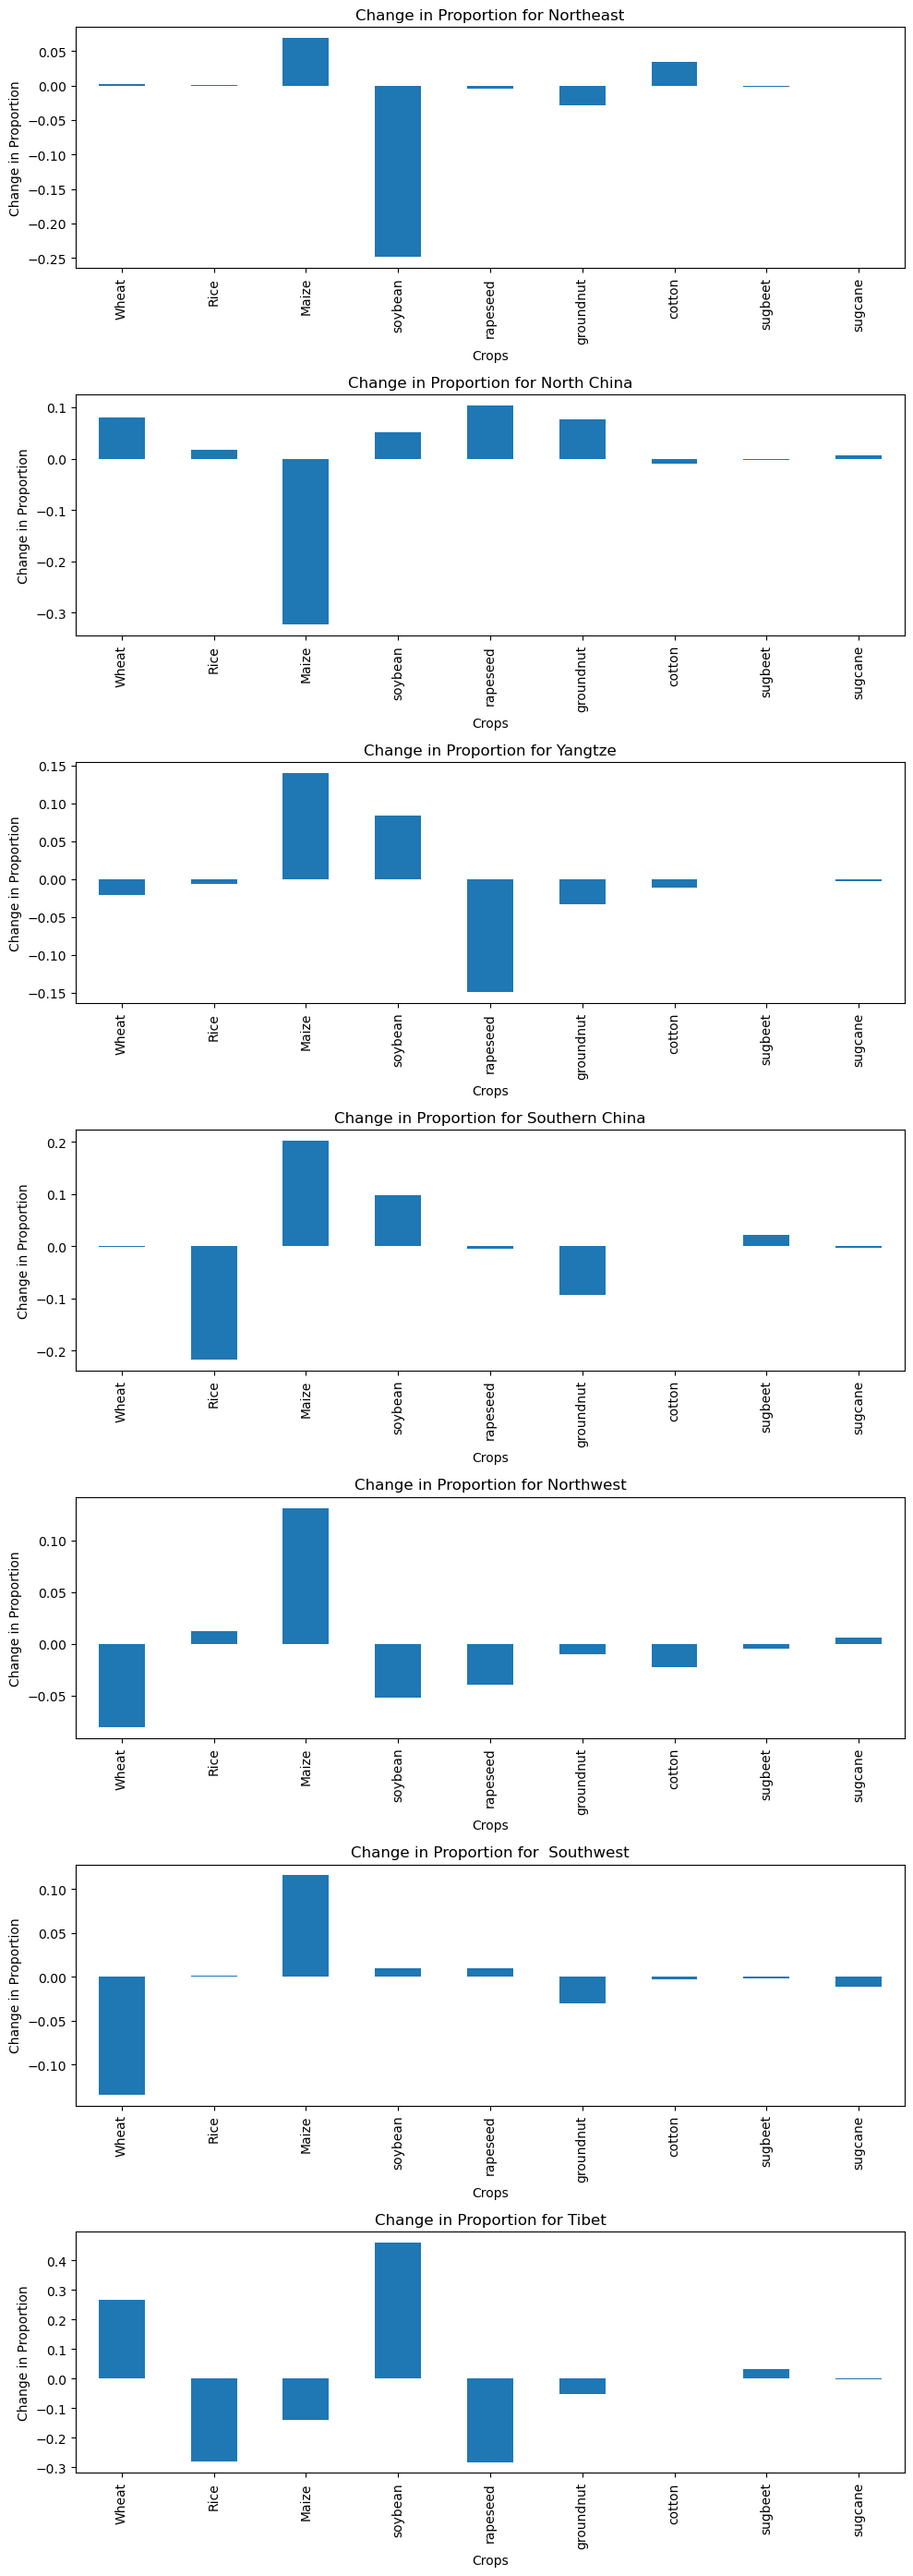

In [75]:
changes = {}
# 计算变化情况
for region in regions:
    changes[region] = {}
    for crop in crops:
        original = original_proportions[region].get(crop, 0)
        optimized = best_proportions.get(f"{region}_{crop}_proportion", 0)
        change = optimized - original
        changes[region][crop] = change
        
df_changes = pd.DataFrame(changes).T

# 可视化变化情况
fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(10, len(regions) * 4))
for i, region in enumerate(regions):
    ax = axes[i]
    df_changes.loc[region].plot(kind='bar', ax=ax)
    ax.set_title(f'Change in Proportion for {region}')
    ax.set_xlabel('Crops')
    ax.set_ylabel('Change in Proportion')
plt.tight_layout()
plt.show()

In [79]:
df_changes

,Wheat,Rice,Maize,soybean,rapeseed,groundnut,cotton,sugbeet,sugcane
Northeast,0.002206,0.000455,0.068923,-0.248872,-0.004582,-0.029160,0.034337,-0.002001,0.000000
North China,0.079954,0.016992,-0.323136,0.051584,0.103340,0.077362,-0.010609,-0.002114,0.006628
Yangtze,-0.021511,-0.006027,0.139795,0.083409,-0.149167,-0.032879,-0.011226,-0.000014,-0.002380
Southern China,-0.001138,-0.217608,0.202692,0.097552,-0.004923,-0.094286,-0.000075,0.021368,-0.003581
Northwest,-0.080275,0.012337,0.131463,-0.051461,-0.039121,-0.010022,-0.022770,-0.004281,0.005975
Southwest,-0.134091,0.001696,0.115494,0.009393,0.010104,-0.030443,-0.003327,-0.001945,-0.011625
Tibet,0.265252,-0.280072,-0.138363,0.458591,-0.282324,-0.052877,-0.000922,0.032290,-0.001575
